In [1]:
import cv2
import numpy as np
from datascience import *
import matplotlib as mpl
from matplotlib import pyplot as plt
import sys
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
mpl.rcParams['figure.dpi'] = 150

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [2]:
images = []
image_names = []
original_img = []

Notes:


Approach: Trying to use a block size in the middle of a block size used for large scales and small scales create an initial binarization that will help us figure out the best adpative block size and iterationamount.
                
                
Noise: Also exploring how to remove noise. In this code as a last step I remove spots that are significantly smaller than the average scale size.

In [3]:
# def countScales(imgName, inital_blocksize):
#     if inital_blocksize = 15:
#         arr 
#     maxRoundness = 0
    
#     for blockSize in [15, 25, 35, 65, 75]: # blocksize must be odd number
#         roundness, count, labeled_img = threshold(imgName, blockSize)
#         if roundness > maxRoundness:
#             maxRoundness = roundness
#             bestCount = count
#             bestSize = blockSize
#             bestImage = labeled_img
#     displayFinal(imgName, bestImage, bestCount, bestSize)

['235227Ventral-Flash-1.png', '235227Ventral-NoFlash-1.png', '235227Ventral-Flash-2.png', '235227Ventral-NoFlash-2.png', '135164_V-3png.png', '135164_V-1.png', '135164_V-2.png', '135164_D-3.png', '135164_D-2.png', '235237Dorsal-Flash-2.png', '135164_D-1.png', '235237Dorsal-Flash-1.png', '235233Dorsal-Flash-1.png']
INITIAL TEST BINARIZATION

235227Ventral-Flash-1.png
Initial Value used


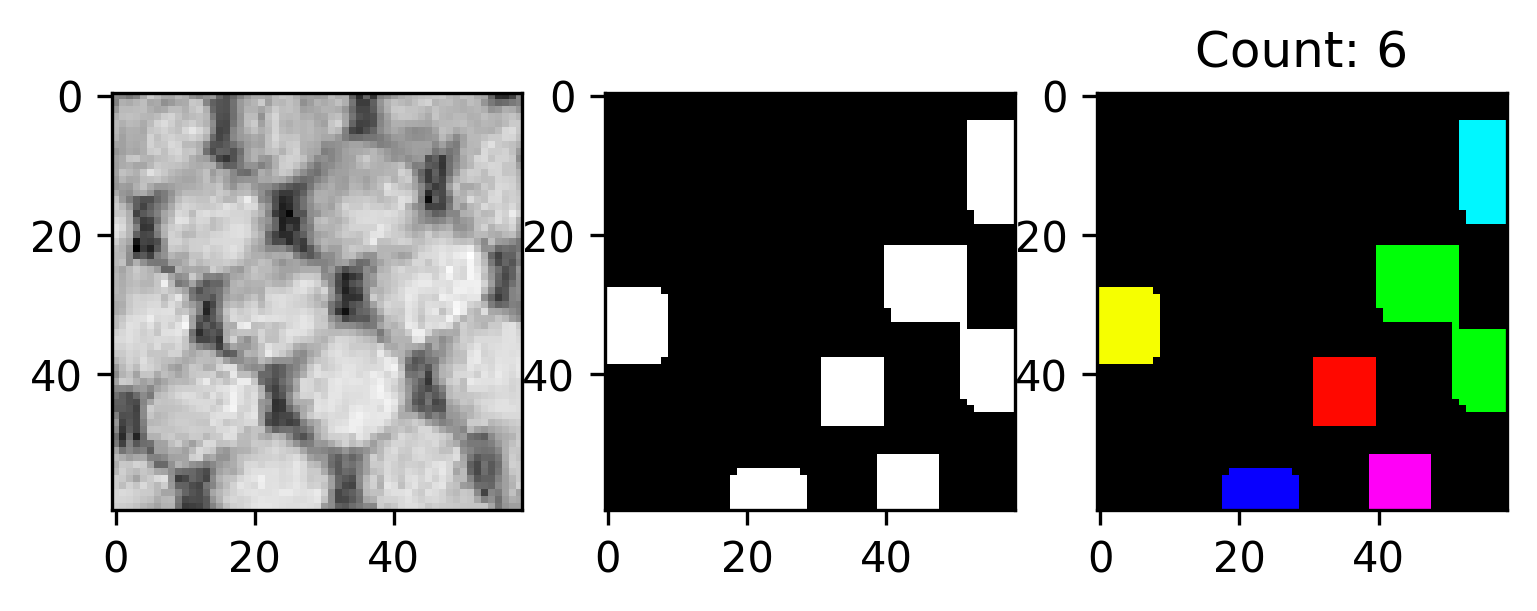

235227Ventral-NoFlash-1.png
Initial Value used


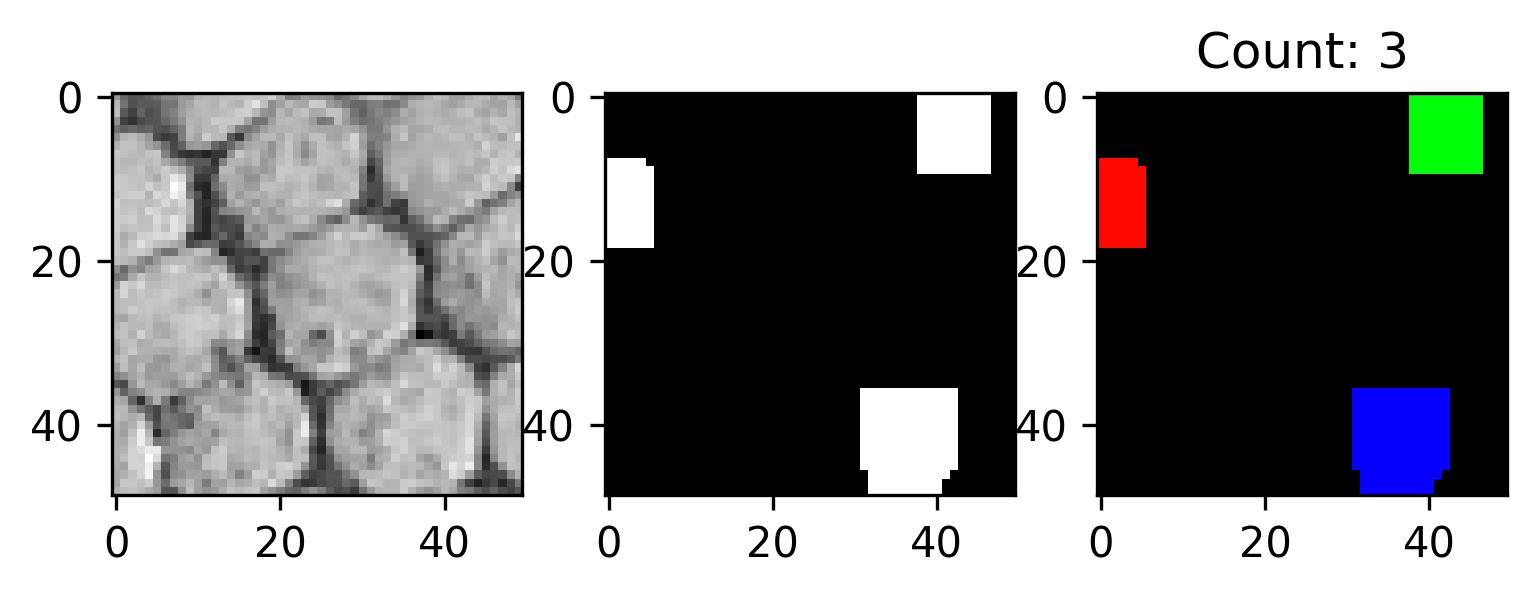

235227Ventral-Flash-2.png
Initial Value used


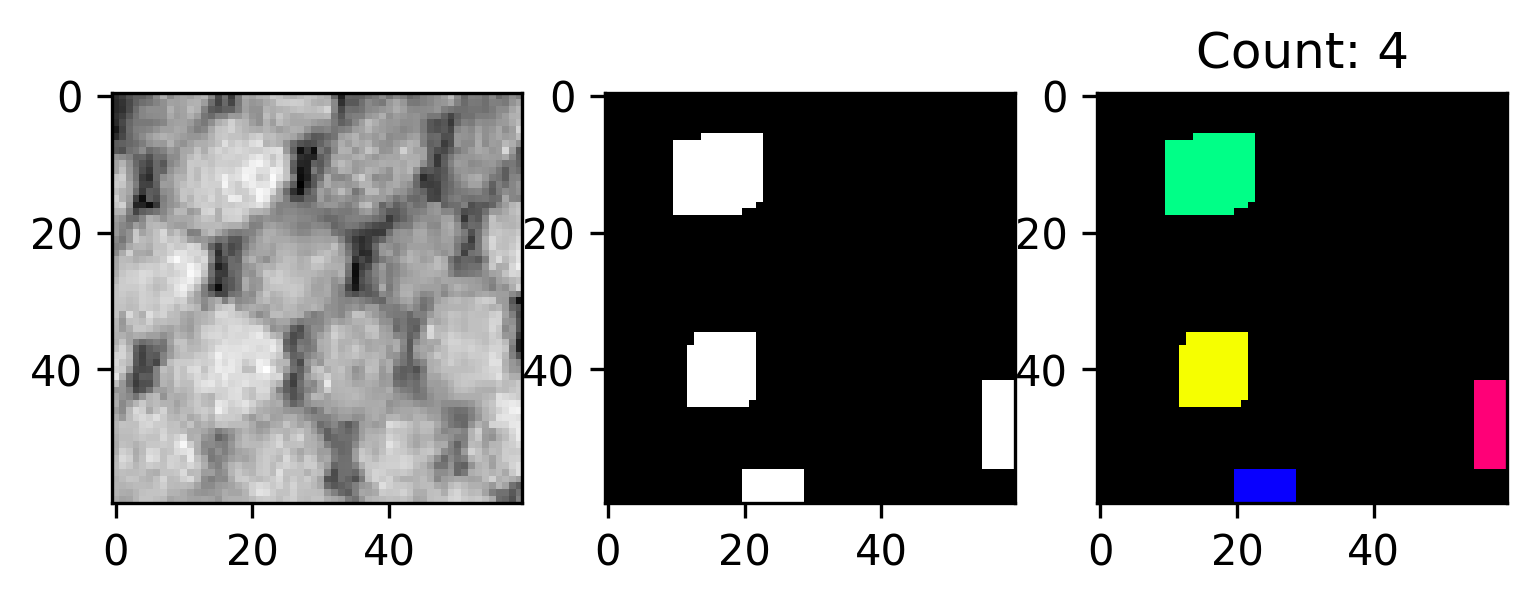

235227Ventral-NoFlash-2.png
Initial Value used


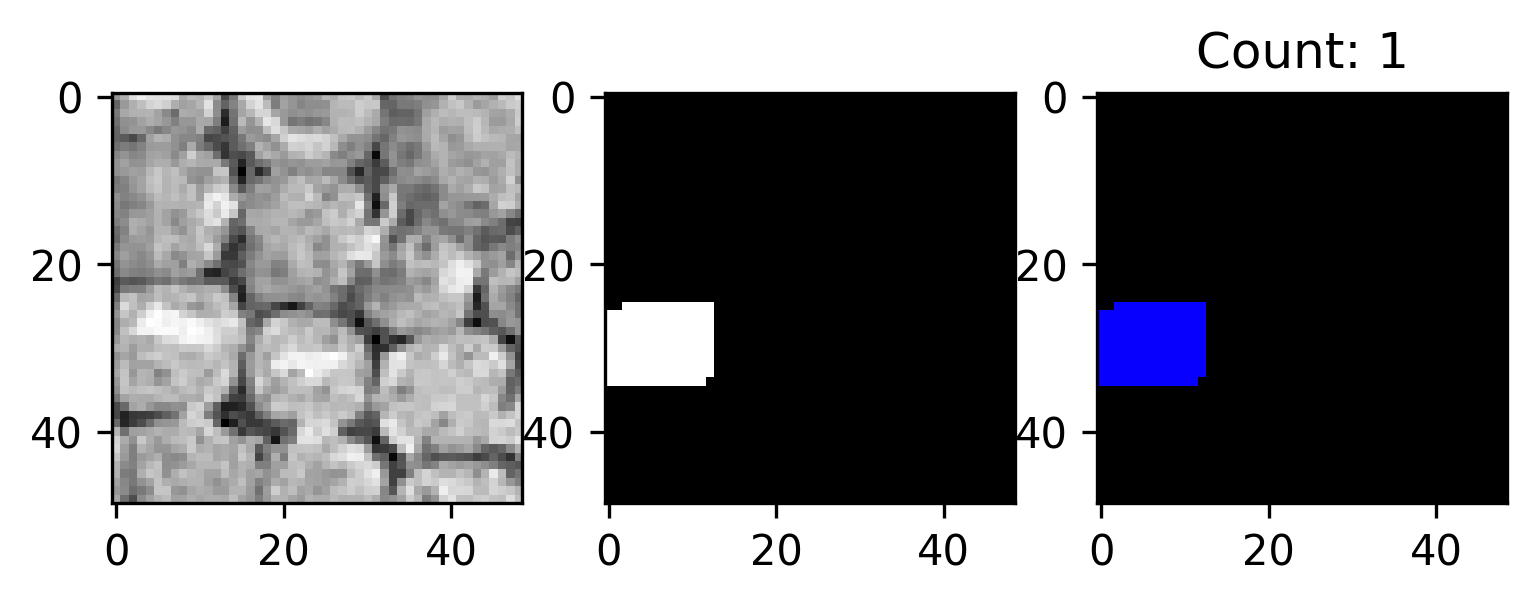

135164_V-3png.png
Initial Value used


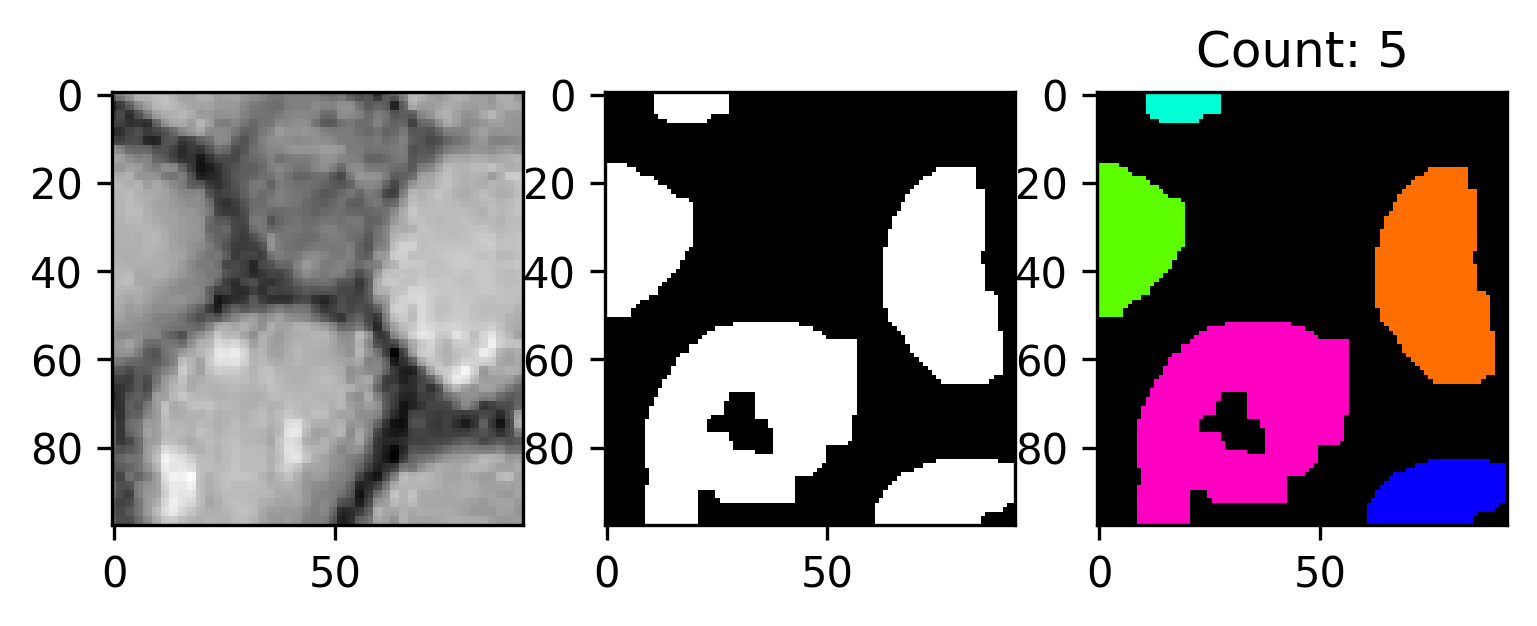

135164_V-1.png
Initial Value used


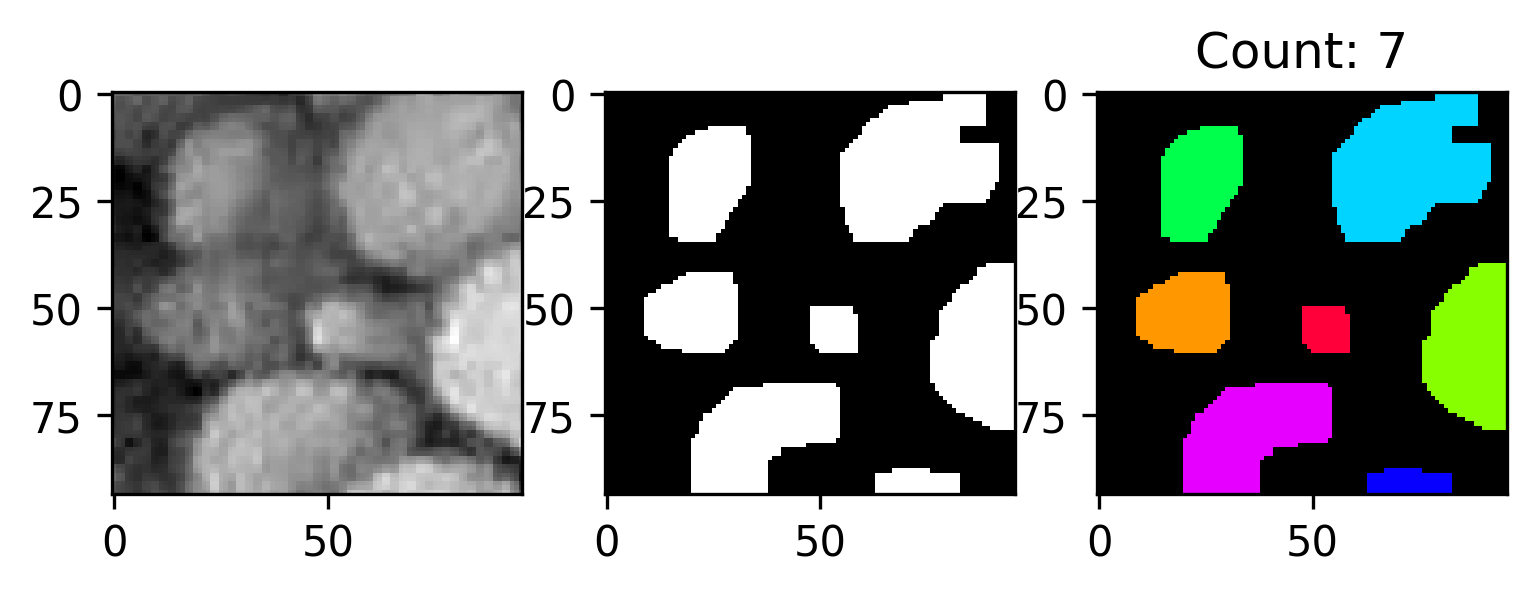

135164_V-2.png
Initial Value used


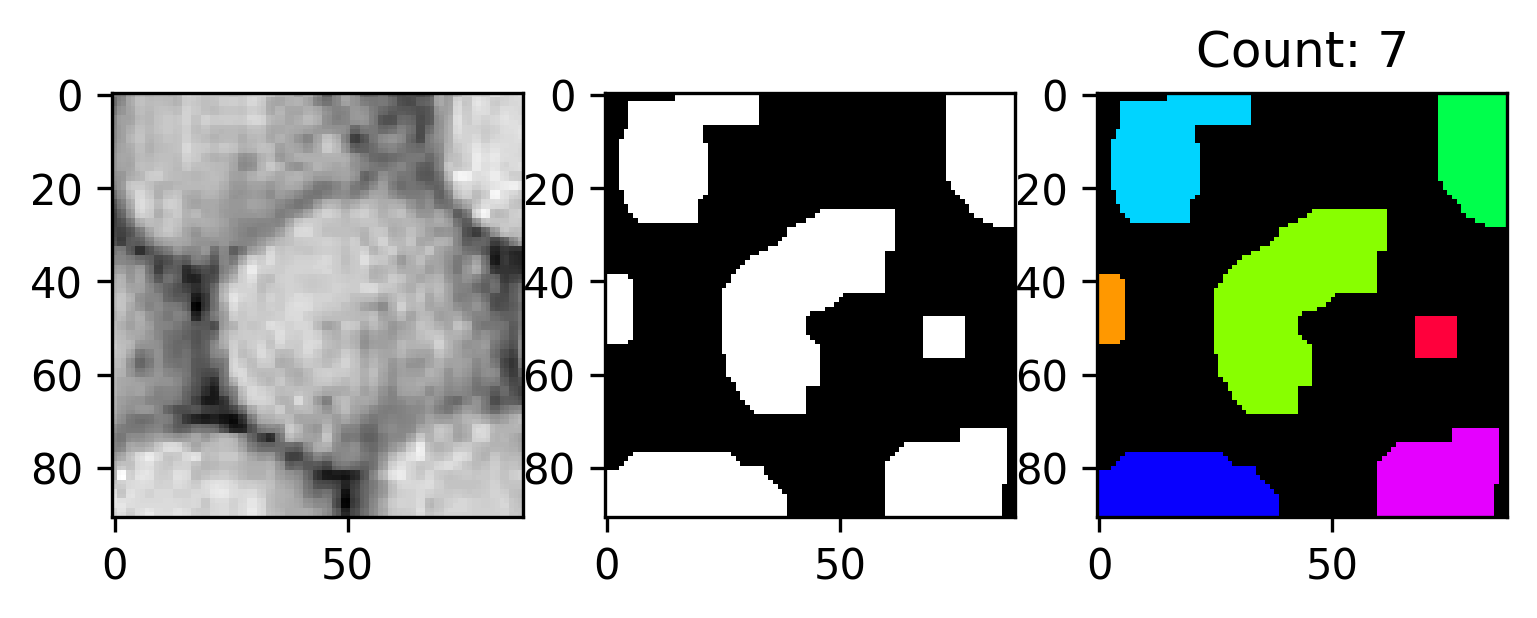

135164_D-3.png
Initial Value used


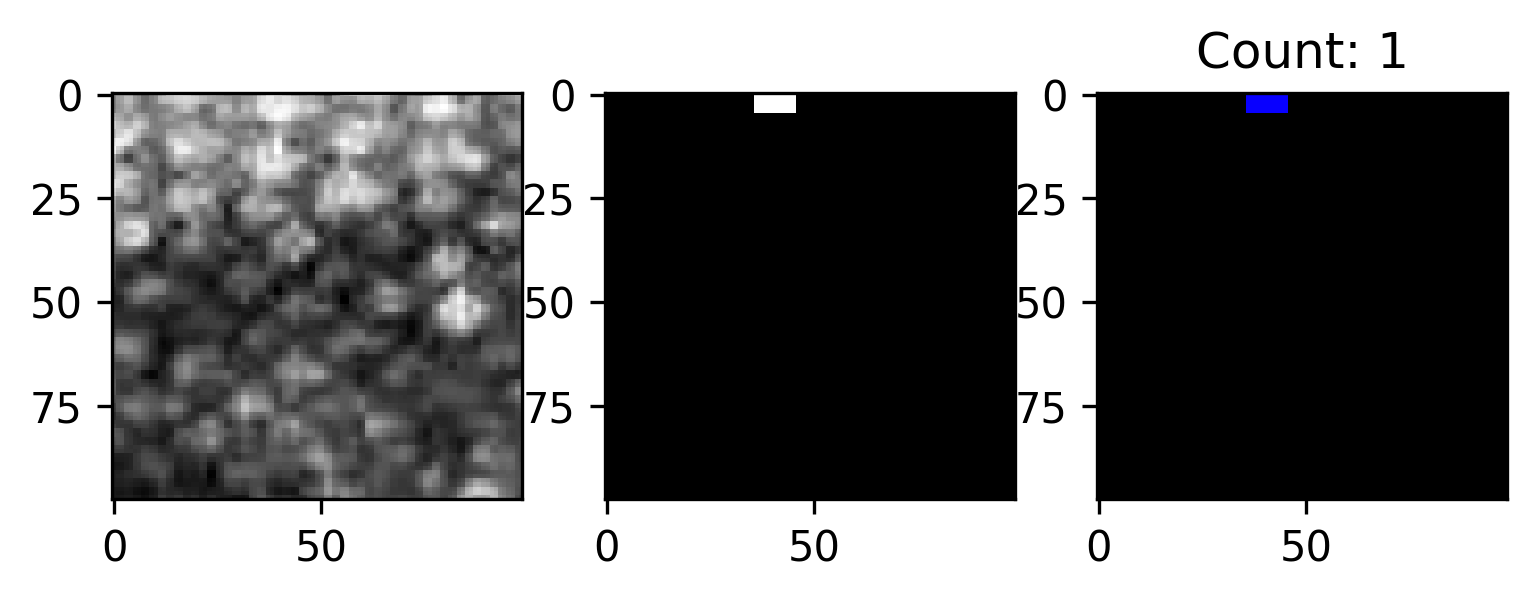

135164_D-2.png
Initial Value used


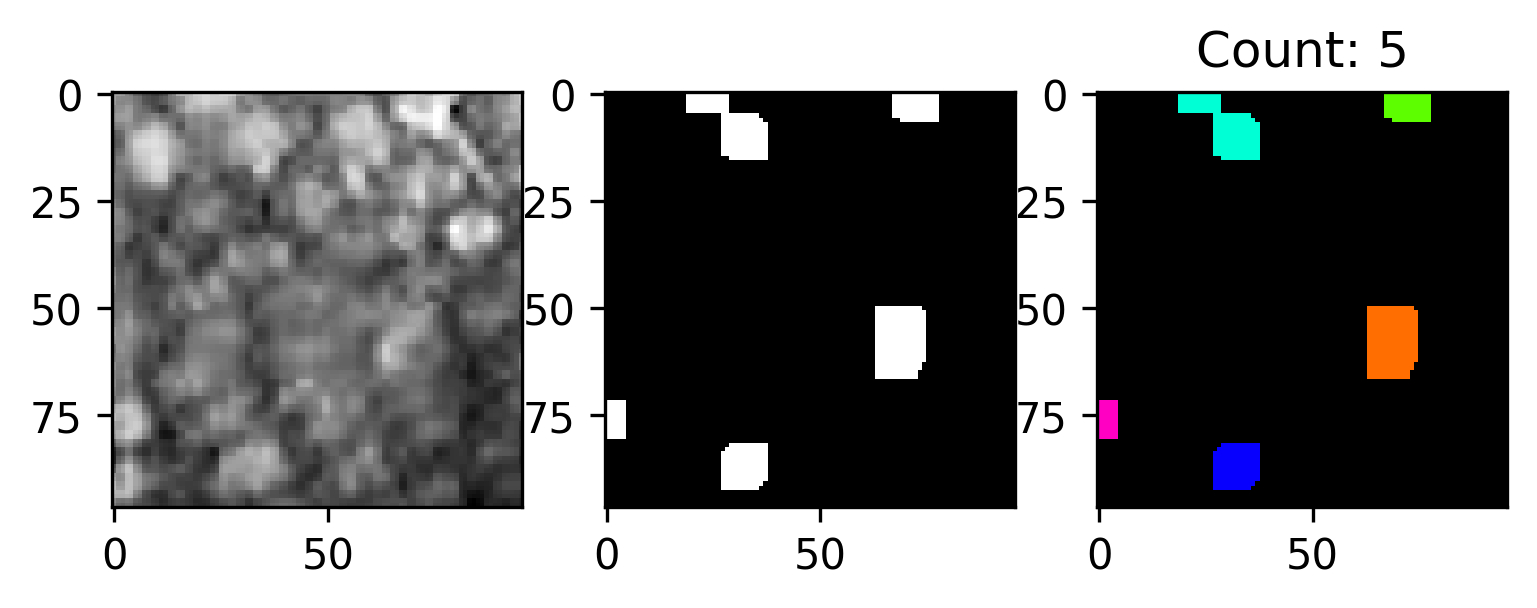

235237Dorsal-Flash-2.png
Initial Value used


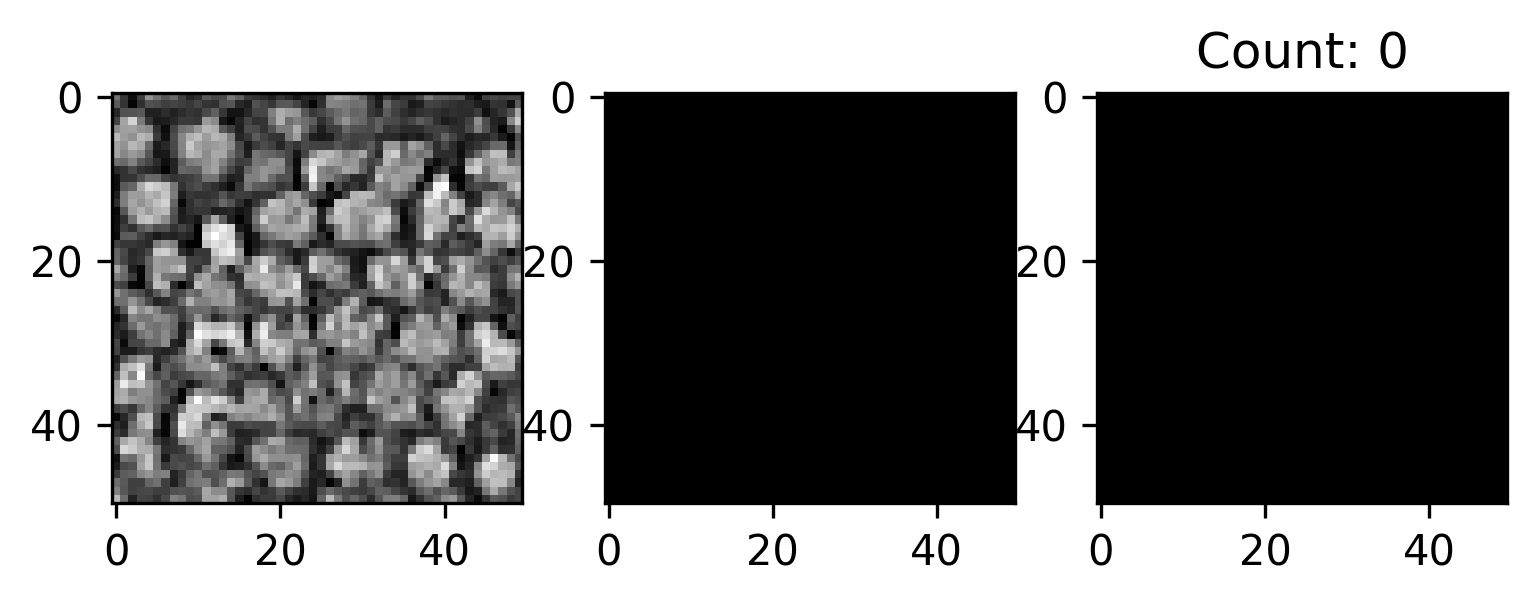

135164_D-1.png
Initial Value used


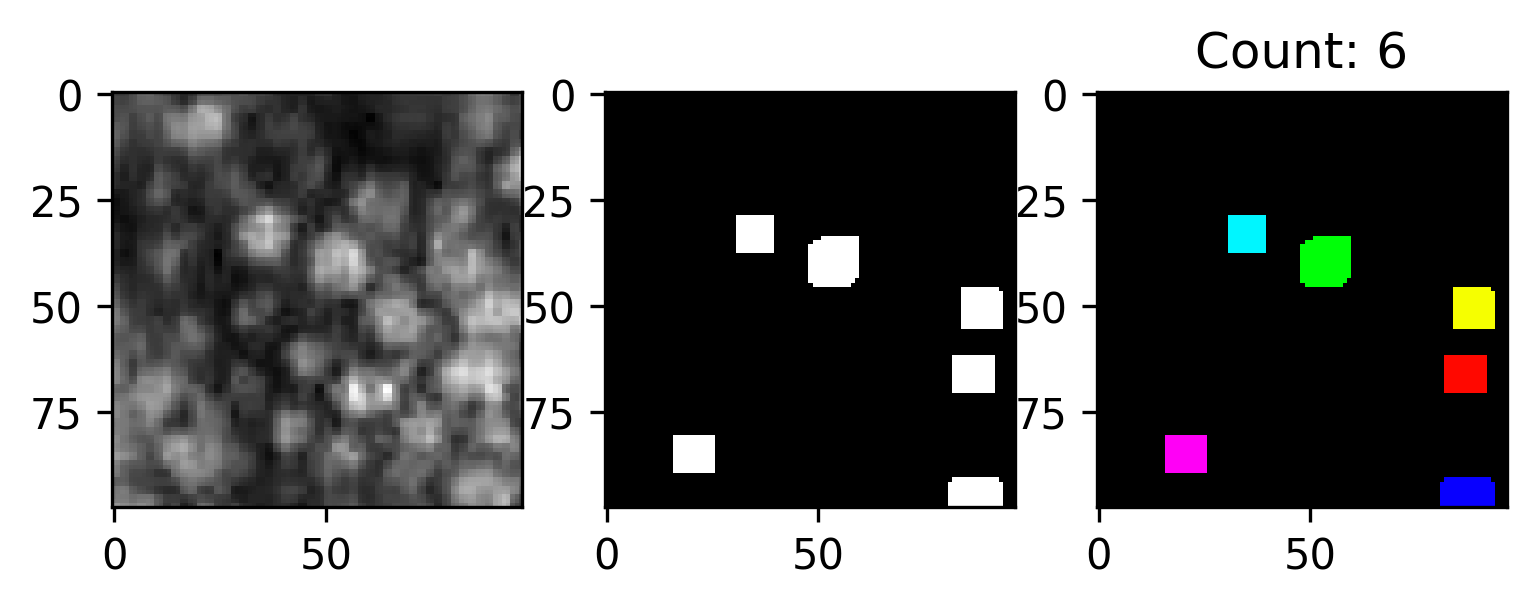

235237Dorsal-Flash-1.png
Initial Value used


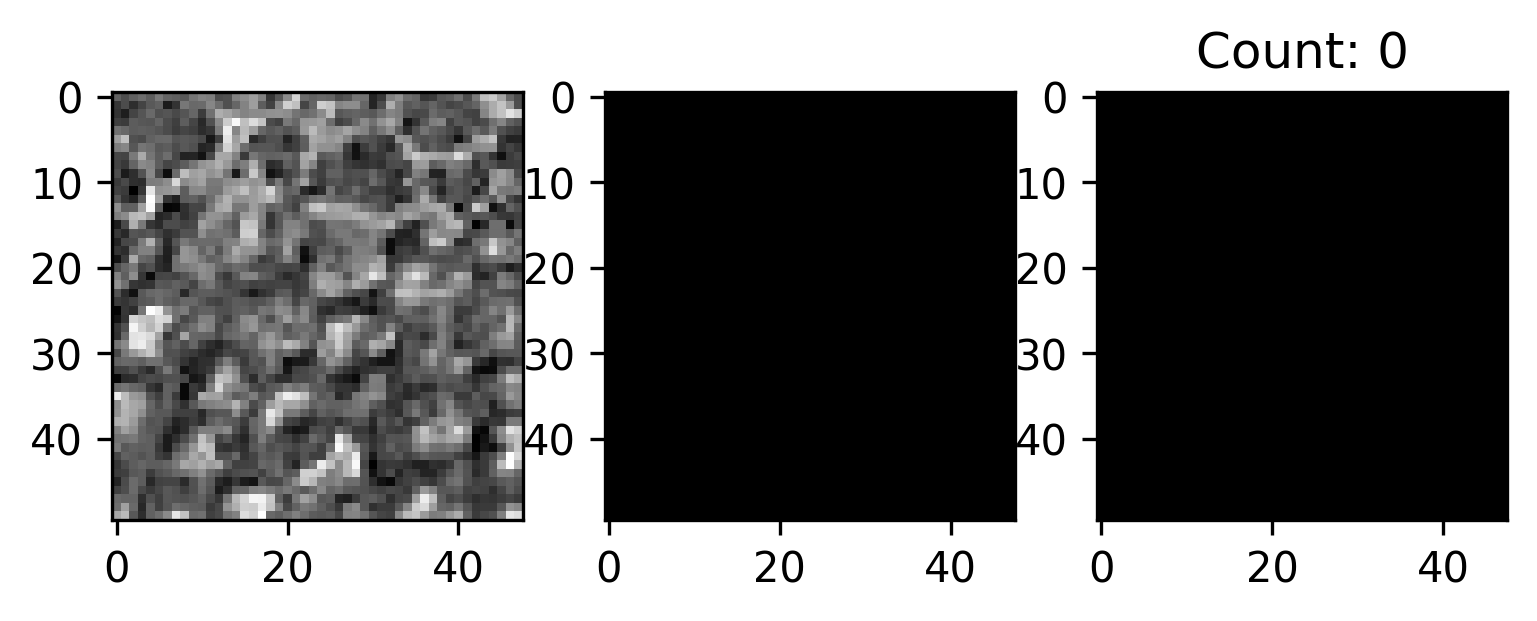

235233Dorsal-Flash-1.png
Initial Value used


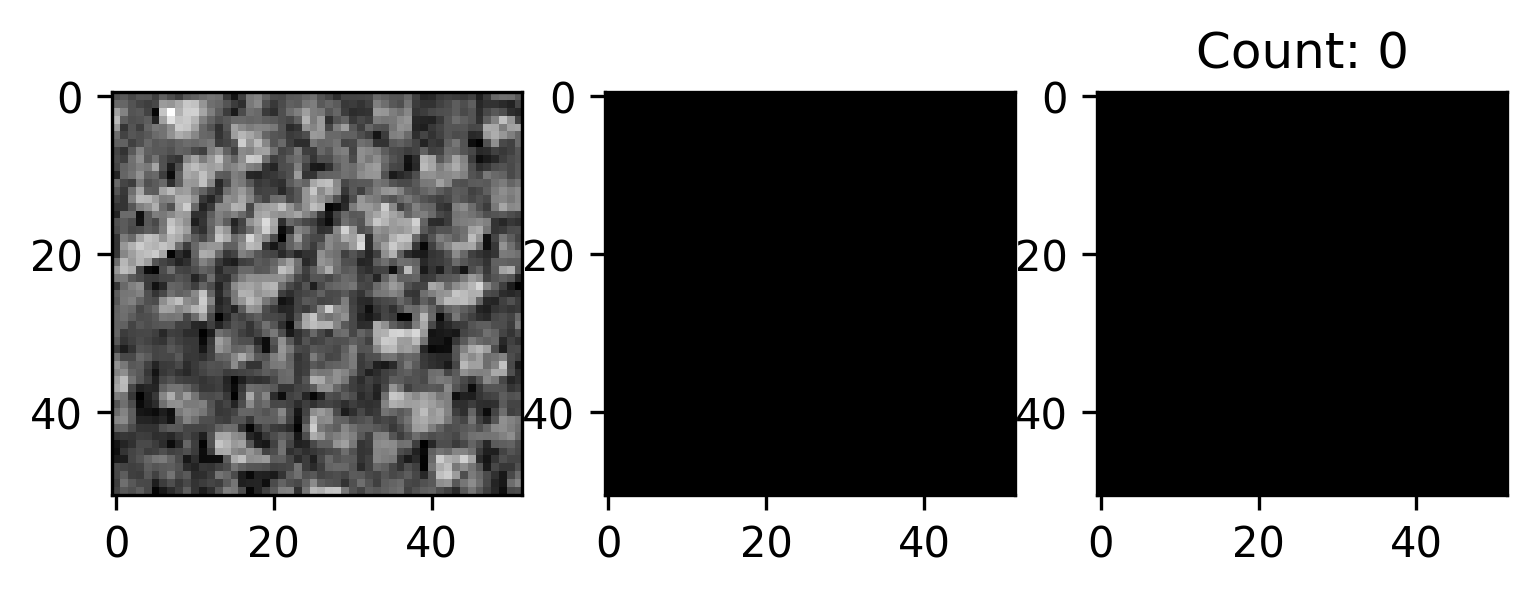

In [4]:
#access img directory
dirname = 'More_images/'

#create an iterator object for img directory
directory = os.scandir(dirname)

print(os.listdir(dirname))

def initial_binarization(initial_block_size, initial_iteration, customized):
    index = 0;
    images.clear
    
    #iterates through each image in the directory
    for img in directory:
        img_name = img.name
        if (img_name != '.ipynb_checkpoints'):
            
            print(img.name)
            image_names.append(img.name)

            #read the image, convert to grayscale add to array and title + blur
            img = cv2.imread(dirname + "" + img_name)
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            original_img.append(gray)
            title = img_name
            blur = cv2.GaussianBlur(gray,(5,5),0)
            
            
            #if the customized block size has not yet been determined this if statement will run
            if(len(customized)==0):
                print("Initial Value used")
                thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, initial_block_size, -2)
           
            #if customized block size has been determined
            else:
                print("Customized Values used")
                print(block_size[index][0], block_size[index][1])
                thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, block_size[index][0], -2)
                
            kernel = np.ones((3,3),np.uint8)
            
            #if the customized iteration number has not yet been determined this if statement will run
            if(len(customized)==0):
                opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 5)
            
            #if customized array is greater than size 0 iteration number has been determined
            else:
                opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations=block_size[index][1])

            
            # sure background area
            sure_bg = cv2.dilate(opening,kernel,iterations=1)

            # Finding sure foreground area: What does cv2.DIST do?
            dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
            ret, sure_fg = cv2.threshold(dist_transform, 1.5, 255, 0) 

            # Finding unknown region
            sure_fg = np.uint8(sure_fg)
            unknown = cv2.subtract(sure_bg,sure_fg)
            
            #adding sure_fg binarization to list of images
            images.append(sure_fg)


            plt.subplot(1,3,1), plt.imshow(gray, 'gray')
            plt.subplot(1,3,2), plt.imshow(sure_fg, 'gray')
            
            
            # Label and count (taken from maggie's code)
            # source: https://medium.com/analytics-vidhya/images-processing-segmentation-and-objects-counting-in-an-image-with-python-and-opencv-216cd38aca8e
            count, labels = cv2.connectedComponents(sure_fg)                
            count = count - 1 # background doesn't count as a scale
            label_hue = np.uint8(179 * labels / np.max(labels))
            blank_ch = 255 * np.ones_like(label_hue)
            labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])
            labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
            labeled_img[label_hue == 0] = 0

            plt.subplot(1, 3, 3), plt.imshow(labeled_img, 'gray')
            plt.title('Count: ' + str(count))
            plt.show()
            index += 1

print("INITIAL TEST BINARIZATION\n")
initial_binarization(41, 4, [])
    

In [5]:
# def threshold(imgName, blockSize):   
#     img = cv2.imread(imgName)
    
#     # convert to grayscale
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
#     # blur and adaptive thresholding
#     # source: https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html
#     blur = cv2.GaussianBlur(gray,(5,5),0)
#     thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, blockSize, -2)

#     # Remove noise by opening
#     kernel = np.ones((3,3),np.uint8)
#     opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN,kernel, iterations=2)
    
#     # Check if opening was too much
#     numWhitePixels = cv2.countNonZero(opening) # number of foreground pixels
#     totalPixels = img.size / 3 # not sure why it has to be divided by 3
#     if numWhitePixels / totalPixels < 0.3:
#         # if opening resulted in less than 30% foreground, decrease number of opening iterations
#         opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN,kernel, iterations=1)
    
#     # Finding sure foreground area
#     dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
#     ret, sure_fg = cv2.threshold(dist_transform, 1.5, 255, 0)
#     sure_fg = np.uint8(sure_fg)

#     # Label and count
#     # source: https://medium.com/analytics-vidhya/images-processing-segmentation-and-objects-counting-in-an-image-with-python-and-opencv-216cd38aca8e
#     output = cv2.connectedComponentsWithStats(sure_fg, 8, cv2.CV_32S)
#     labels = output[1]
#     count = output[0] - 1 # background doesn't count as a scale
#     label_hue = np.uint8(179 * labels / np.max(labels))
#     blank_ch = 255 * np.ones_like(label_hue)
#     labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])
#     labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
#     labeled_img[label_hue == 0] = 0
    
#     stats = output[2]
#     areas = []
#     ratios = []
#     for i in range(1, count + 1): # start at 1 instead of 0 because don't want to count background as a scale
#         scaleArea = stats[i, cv2.CC_STAT_AREA]
#         areas.append(scaleArea)
#         boxArea = stats[i, cv2.CC_STAT_WIDTH] * stats[i, cv2.CC_STAT_HEIGHT]
#         ratios.append(scaleArea / boxArea)
#     avgRoundness = sum(ratios) / len(ratios)
#     #avgSize = sum(areas) / len(areas)
#     #variance = sum([((x - avgSize) ** 2) for x in areas]) / len(areas)
#     #stdDev = variance ** 0.5
    
#     #displayTests(gray, imgName, thresh, opening, sure_fg, labeled_img, count)
    
#     return (avgRoundness, count, labeled_img)

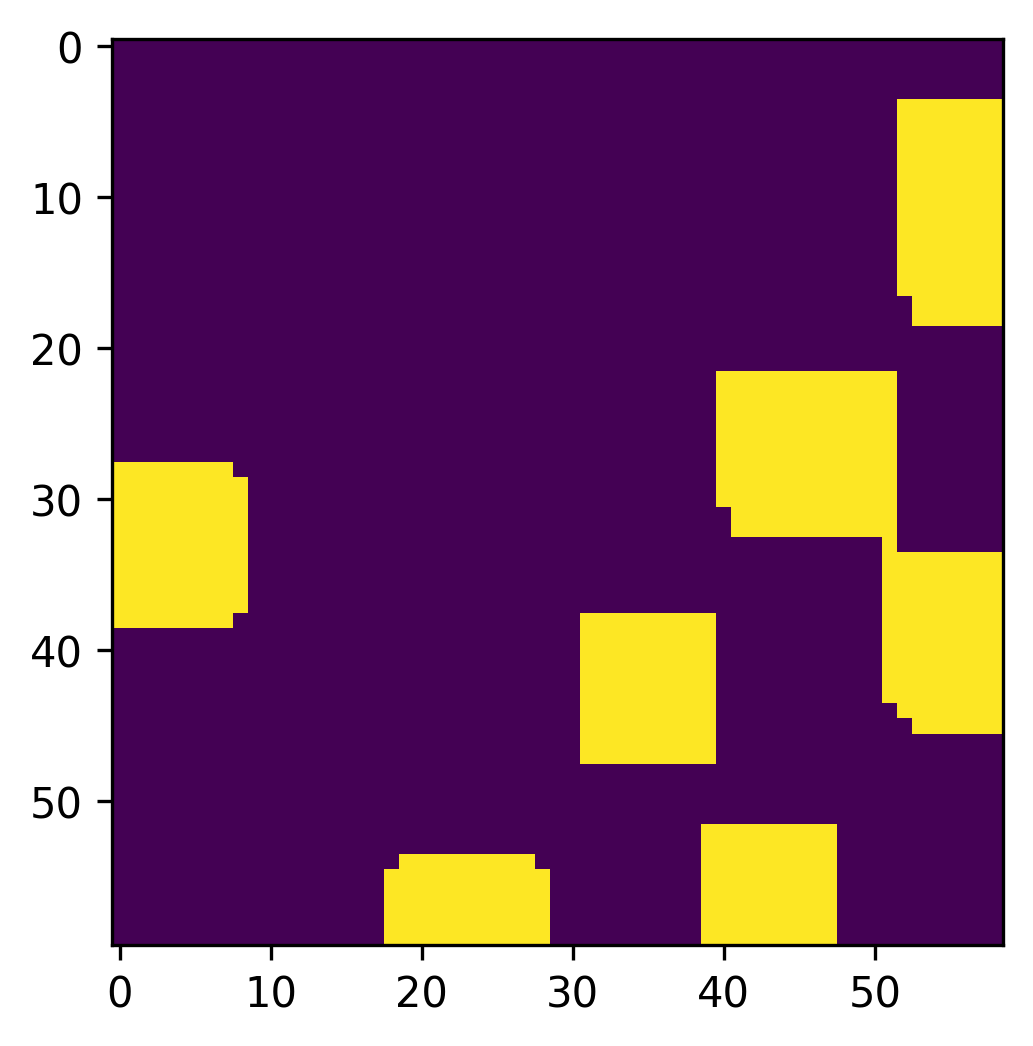

[103 224  97  90  72  64]
Number of scales detected 6
Average size of scales:  108.33333333333333
[[7, 108.33333333333333]]


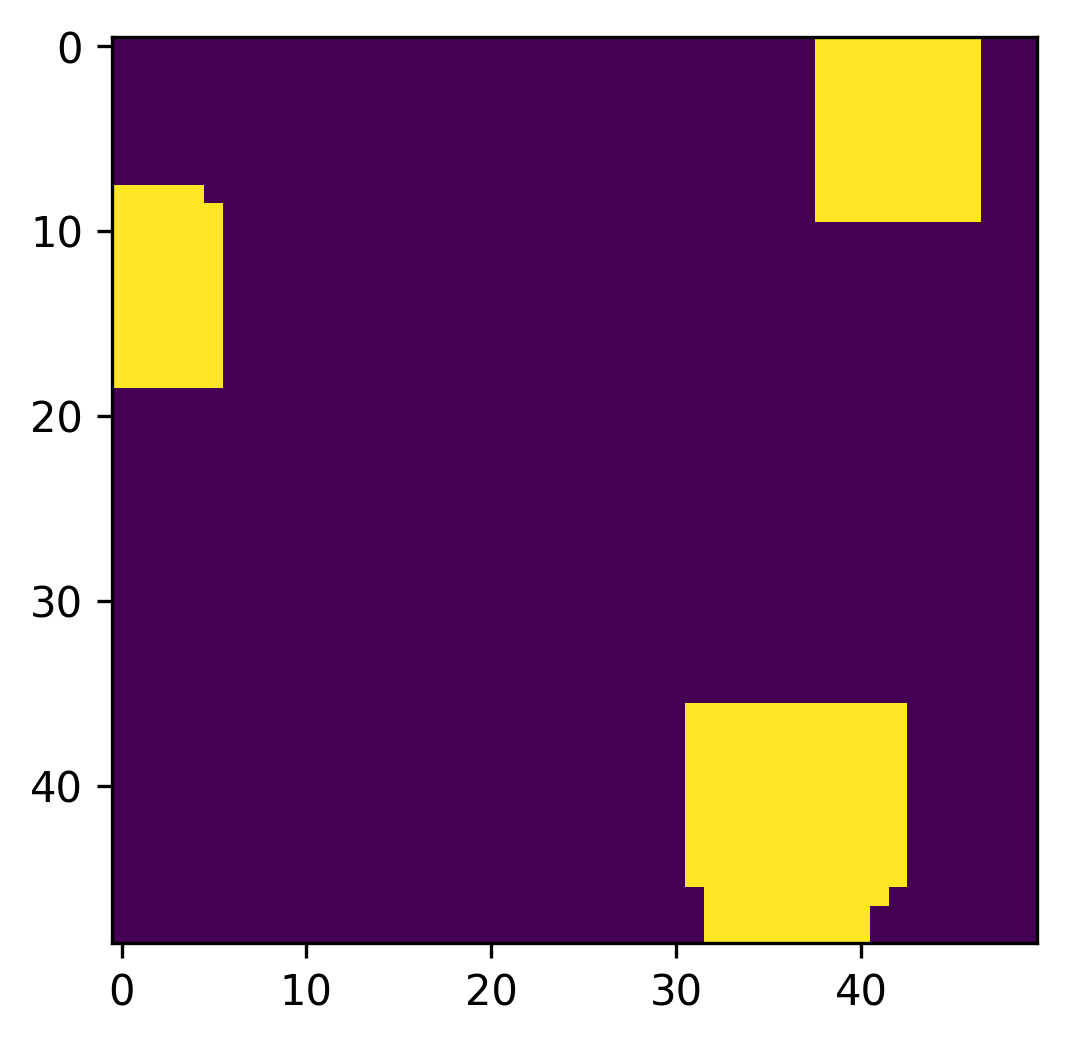

[ 90  65 148]
Number of scales detected 3
Average size of scales:  101.0
[[7, 108.33333333333333], [4, 101.0]]


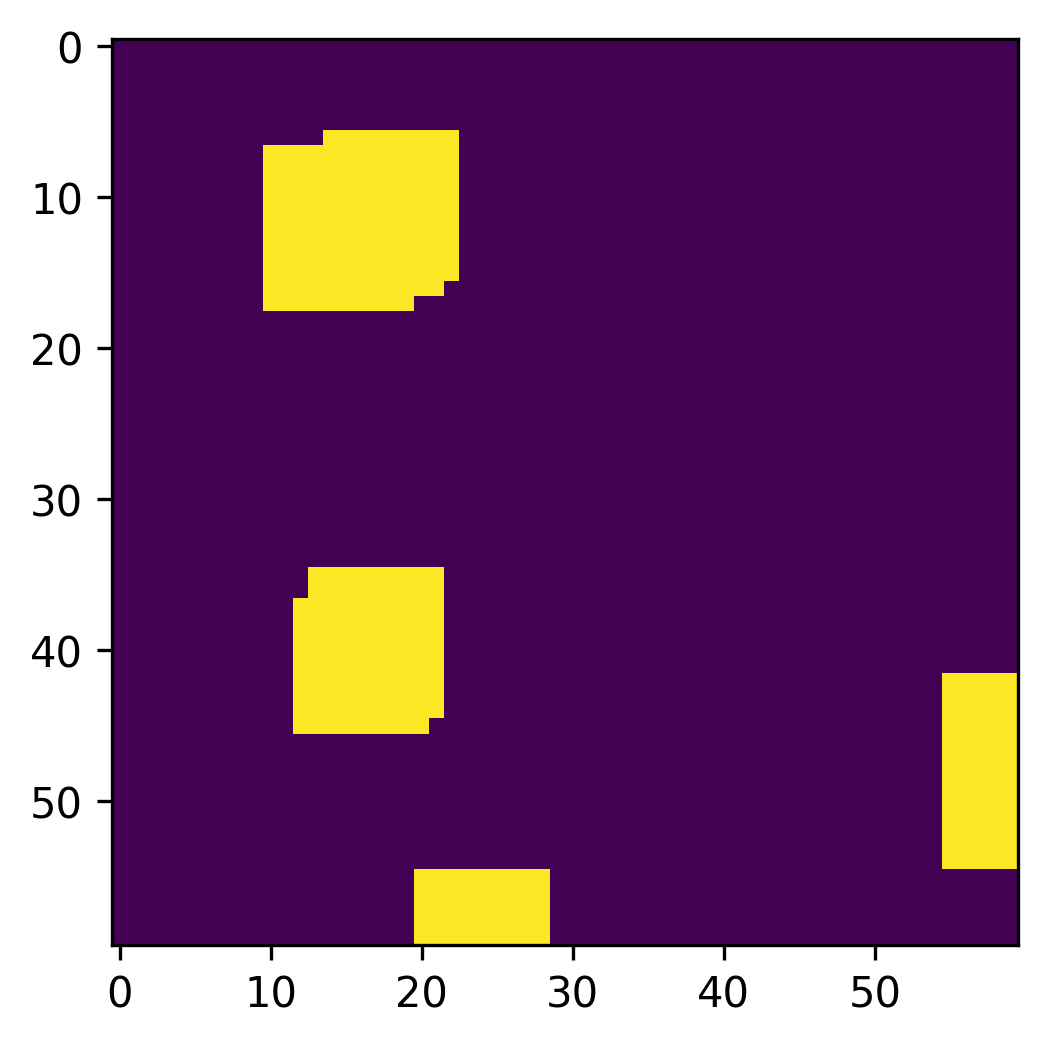

[148 107  65  45]
Number of scales detected 4
Average size of scales:  91.25
[[7, 108.33333333333333], [4, 101.0], [5, 91.25]]


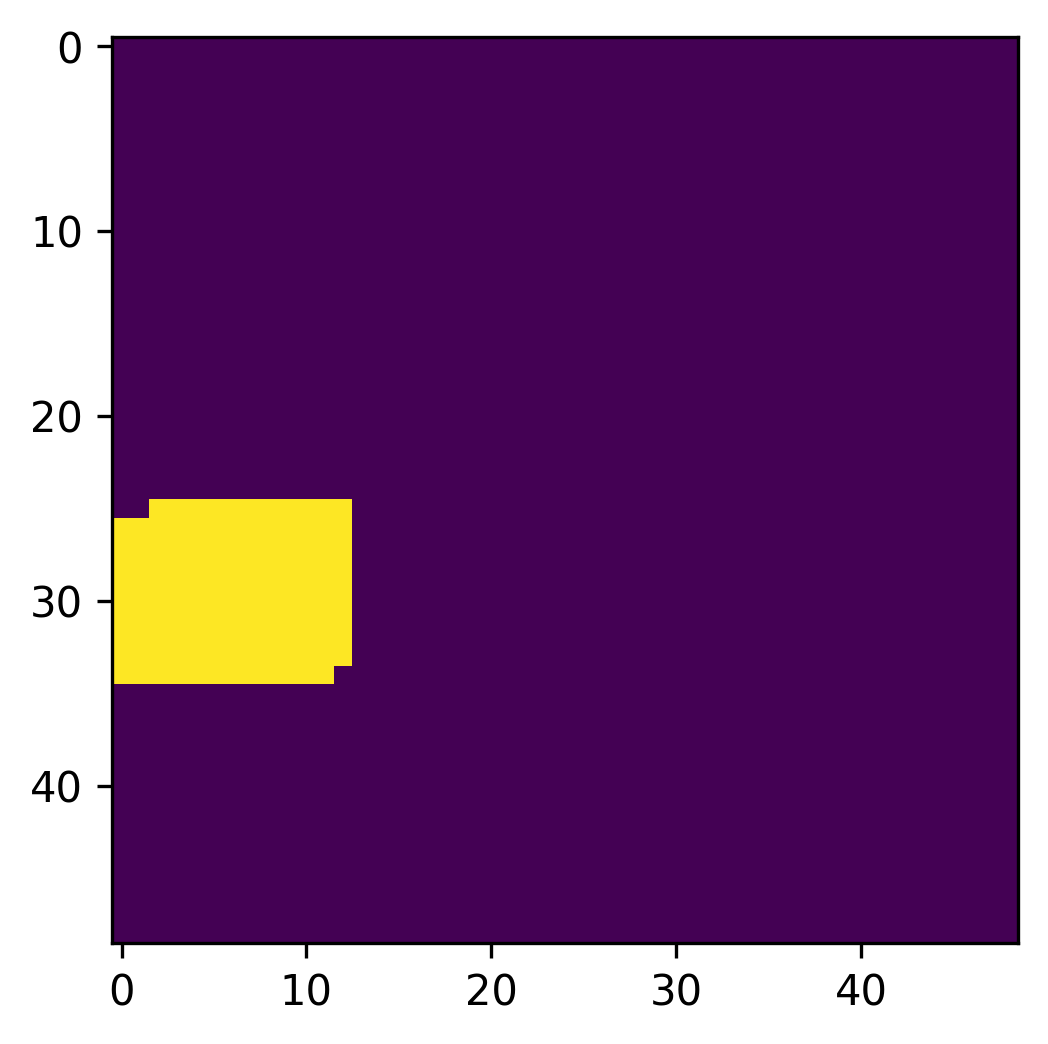

[127]
Number of scales detected 1
Average size of scales:  127.0
[[7, 108.33333333333333], [4, 101.0], [5, 91.25], [2, 127.0]]


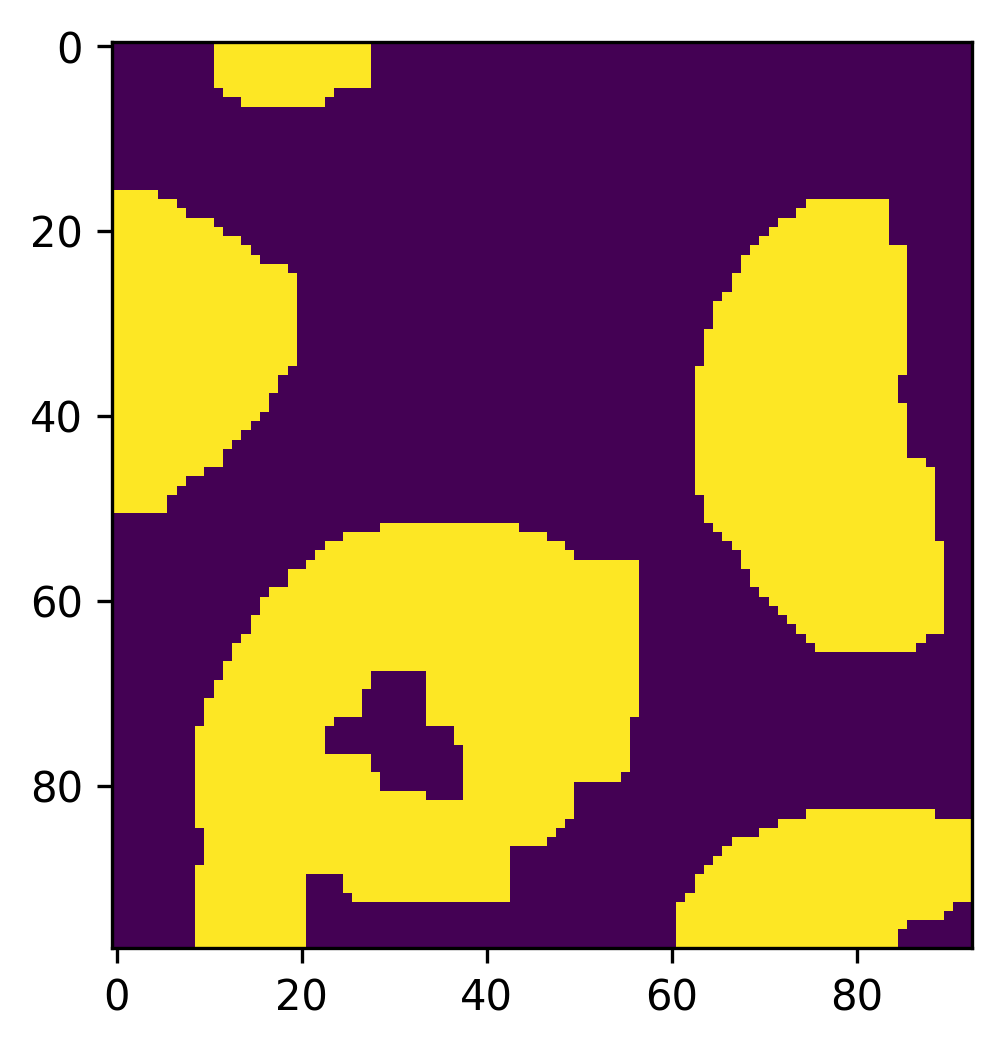

[ 106  515  995 1543  391]
Number of scales detected 5
Average size of scales:  710.0
[[7, 108.33333333333333], [4, 101.0], [5, 91.25], [2, 127.0], [6, 710.0]]


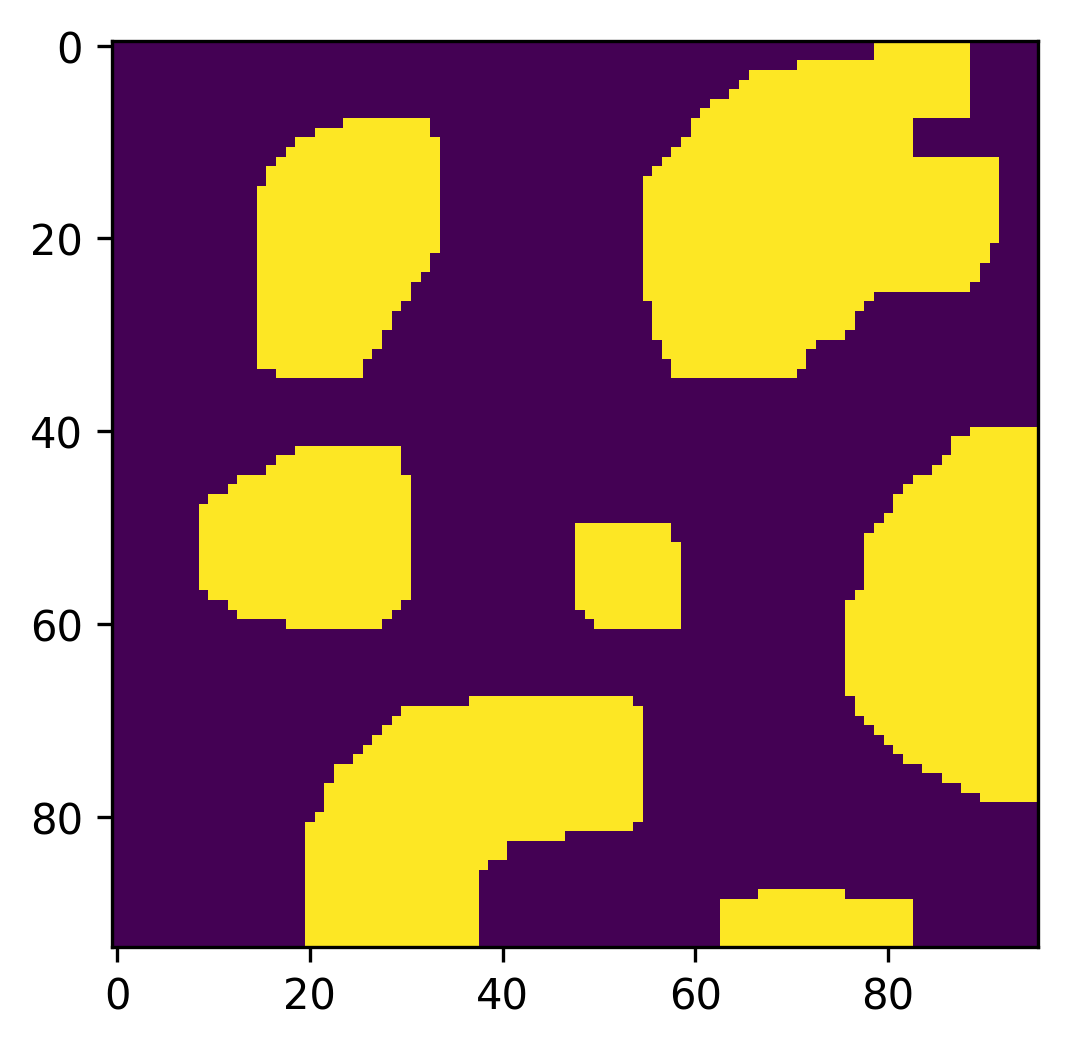

[932 424 617 359 116 645 109]
Number of scales detected 7
Average size of scales:  457.42857142857144
[[7, 108.33333333333333], [4, 101.0], [5, 91.25], [2, 127.0], [6, 710.0], [8, 457.42857142857144]]


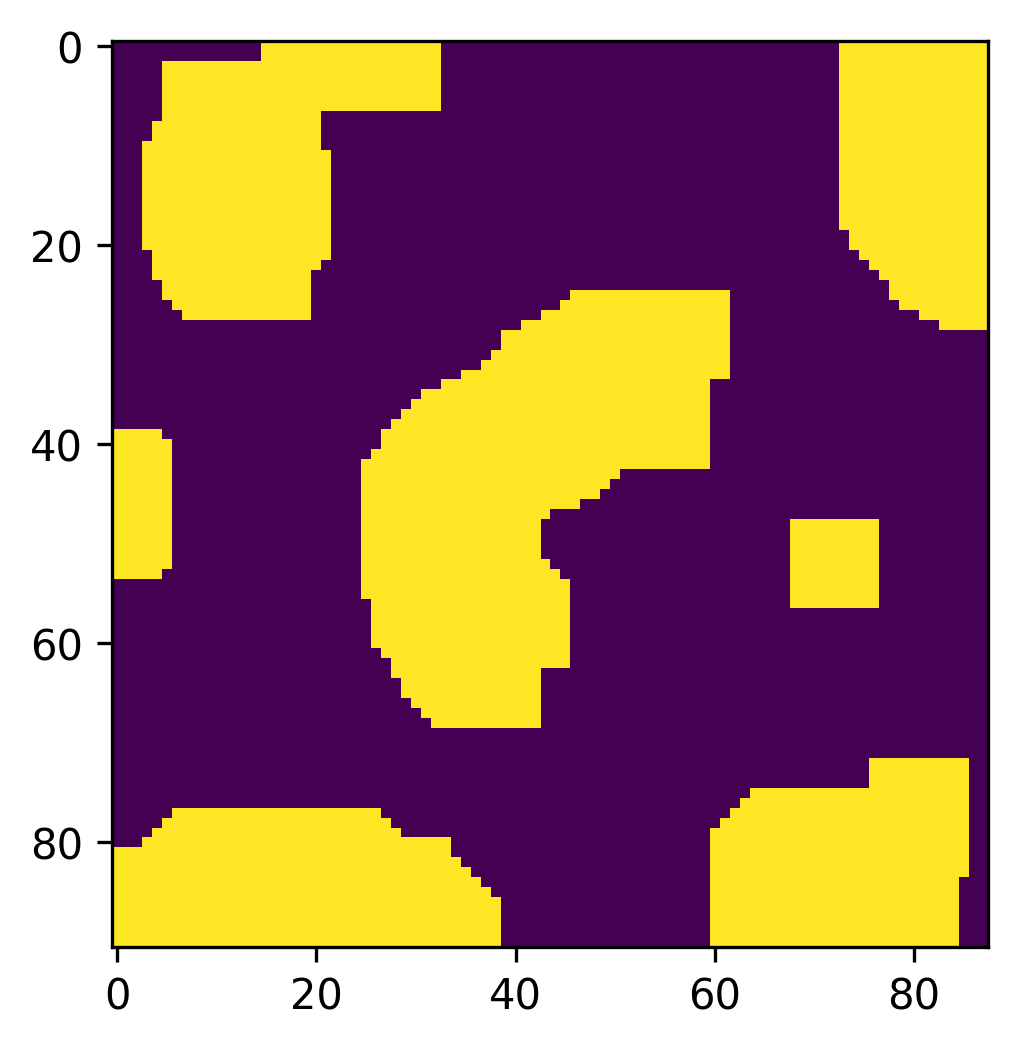

[542 390 964  88  81 429 475]
Number of scales detected 7
Average size of scales:  424.14285714285717
[[7, 108.33333333333333], [4, 101.0], [5, 91.25], [2, 127.0], [6, 710.0], [8, 457.42857142857144], [8, 424.14285714285717]]


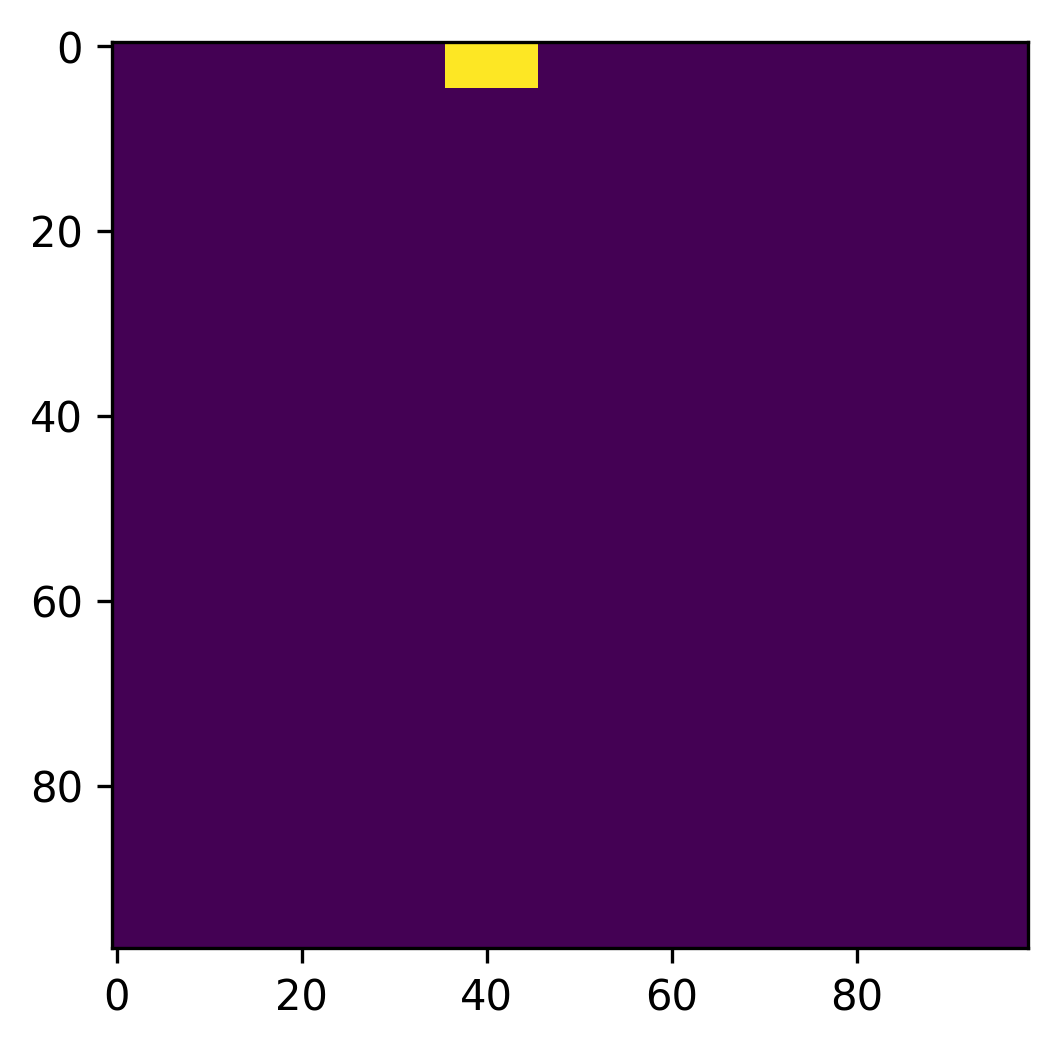

[50]
Number of scales detected 1
Average size of scales:  50.0
[[7, 108.33333333333333], [4, 101.0], [5, 91.25], [2, 127.0], [6, 710.0], [8, 457.42857142857144], [8, 424.14285714285717], [2, 50.0]]


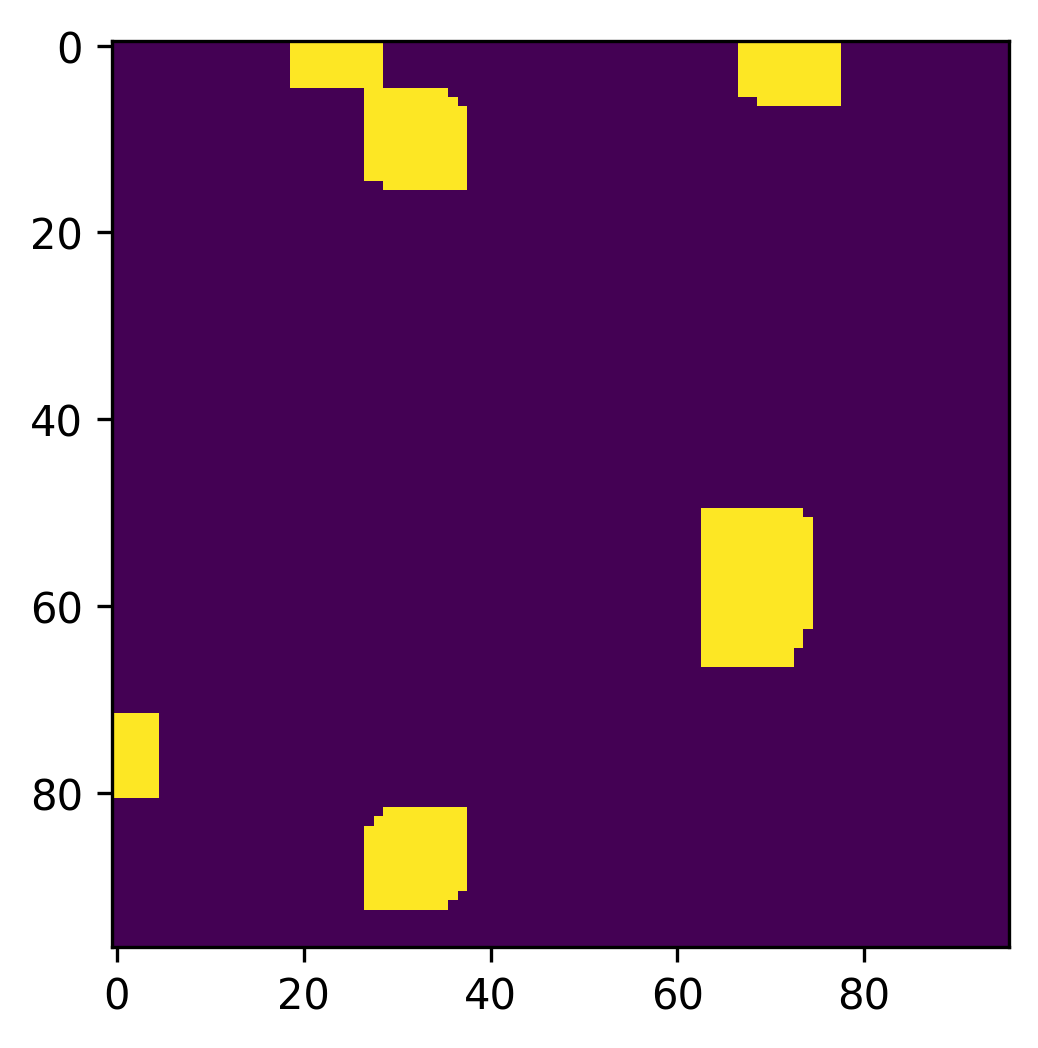

[166  75 197  45 115]
Number of scales detected 5
Average size of scales:  119.6
[[7, 108.33333333333333], [4, 101.0], [5, 91.25], [2, 127.0], [6, 710.0], [8, 457.42857142857144], [8, 424.14285714285717], [2, 50.0], [6, 119.6]]


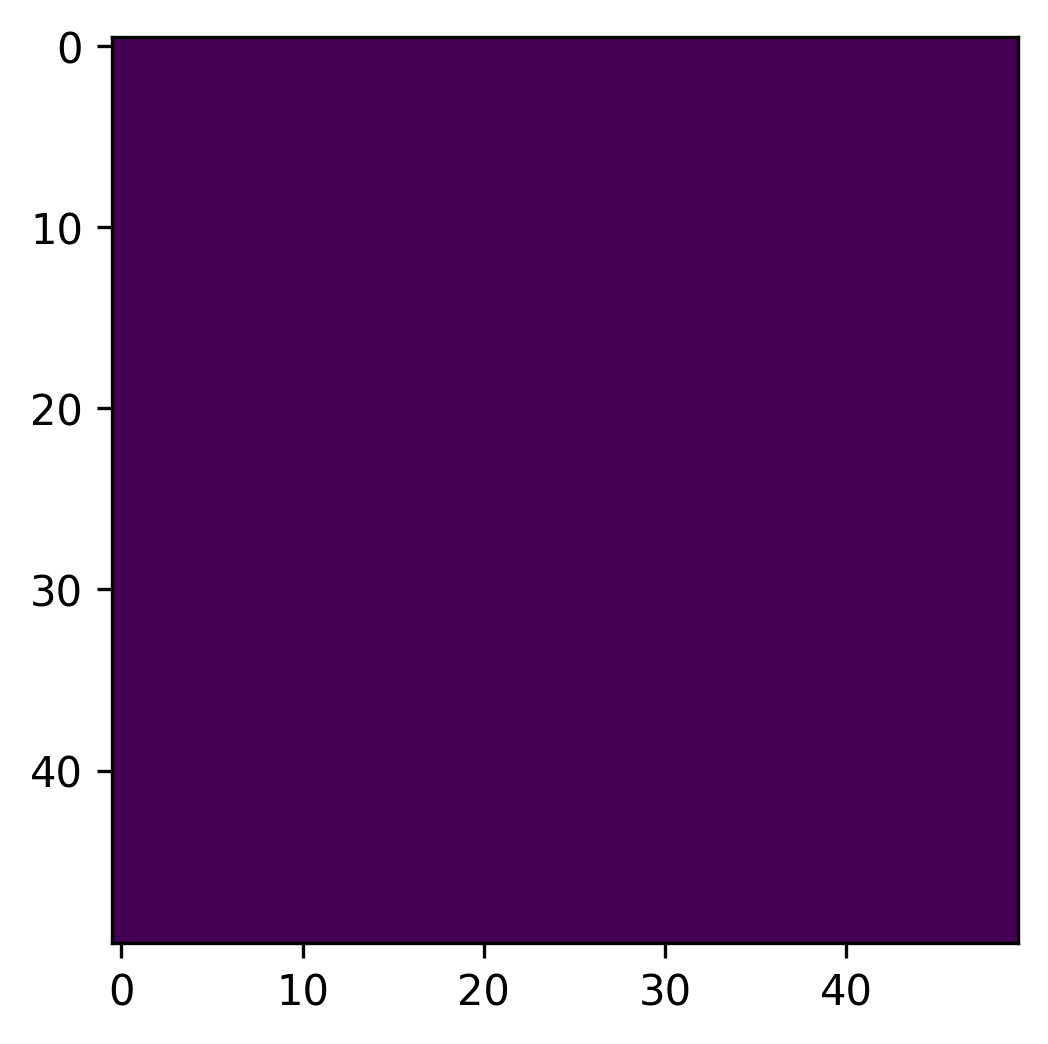

[]
Number of scales detected 0
Average size of scales:  nan
[[7, 108.33333333333333], [4, 101.0], [5, 91.25], [2, 127.0], [6, 710.0], [8, 457.42857142857144], [8, 424.14285714285717], [2, 50.0], [6, 119.6], [1, nan]]


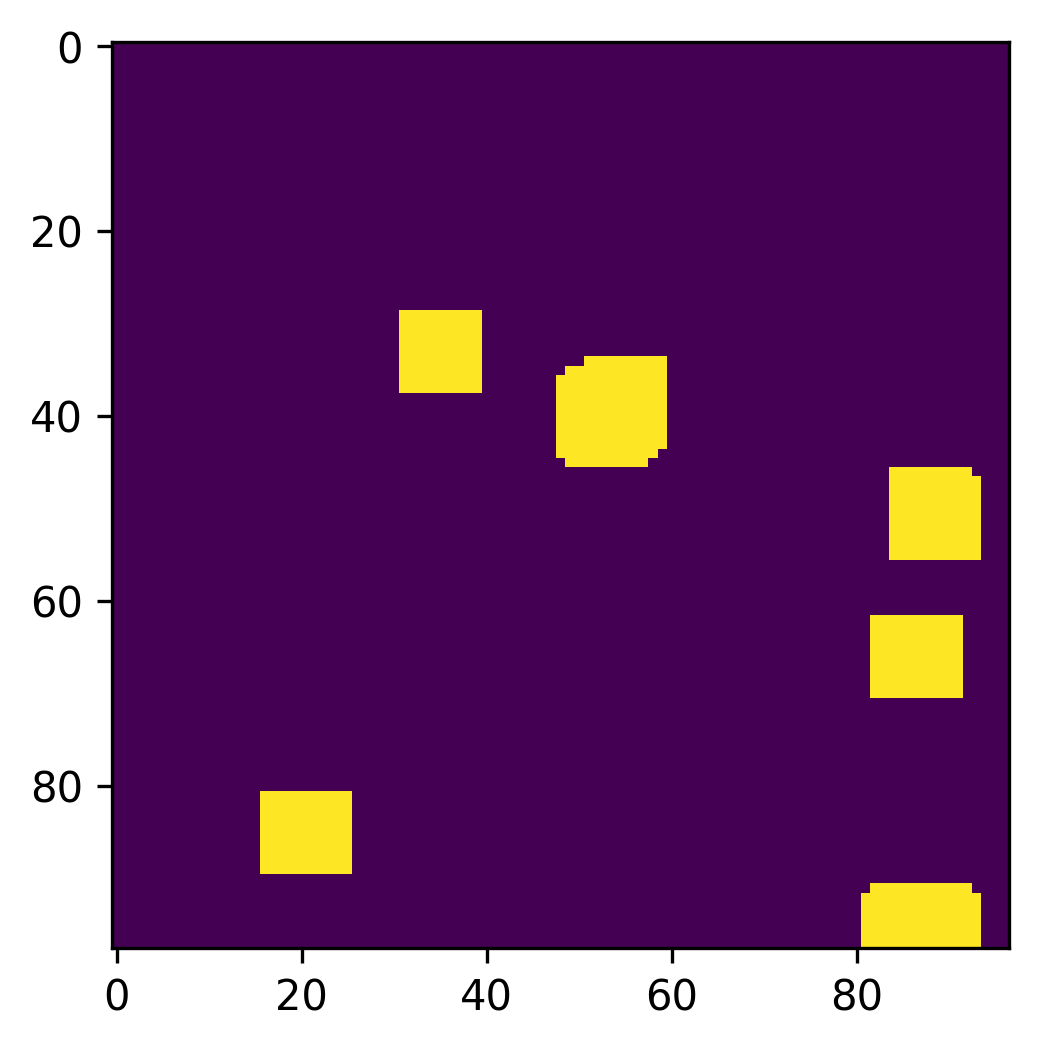

[ 81 136  99  90  90  89]
Number of scales detected 6
Average size of scales:  97.5
[[7, 108.33333333333333], [4, 101.0], [5, 91.25], [2, 127.0], [6, 710.0], [8, 457.42857142857144], [8, 424.14285714285717], [2, 50.0], [6, 119.6], [1, nan], [7, 97.5]]


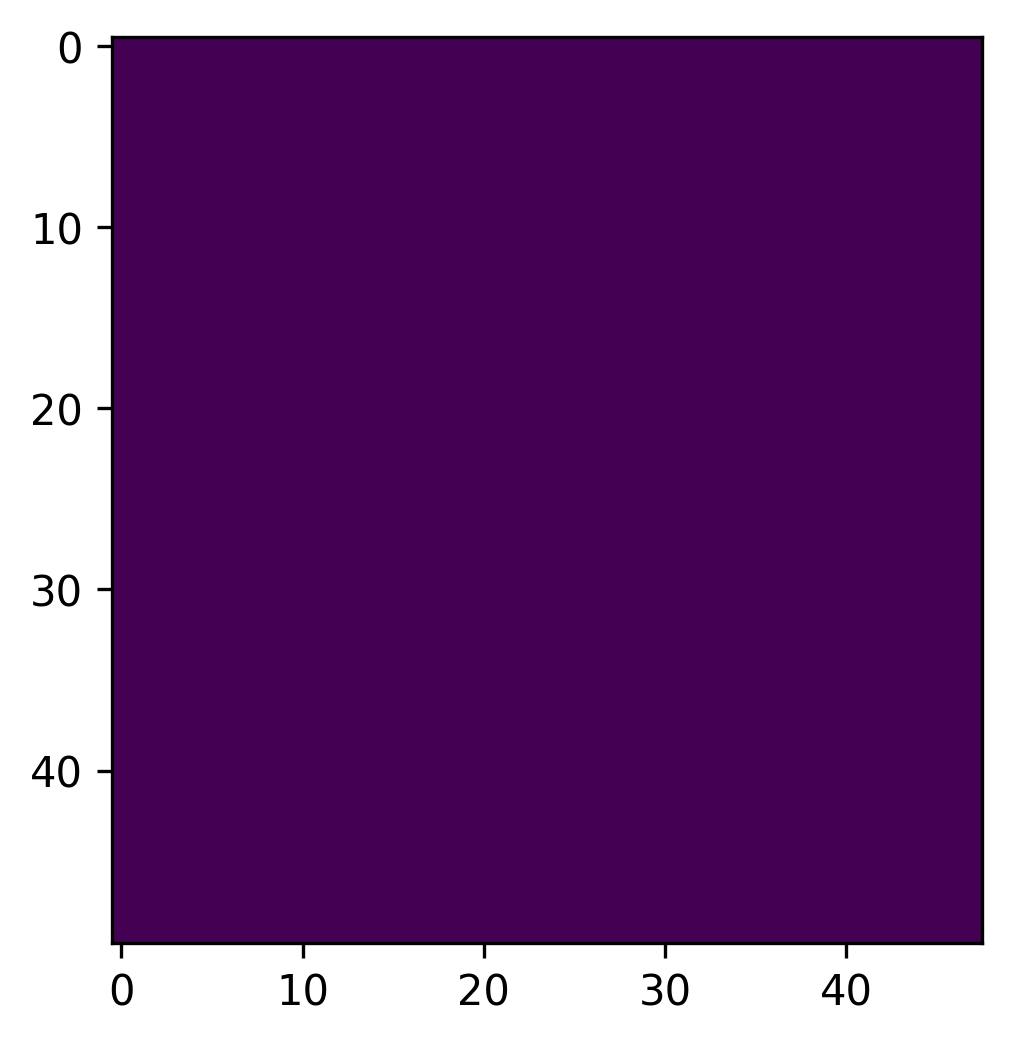

[]
Number of scales detected 0
Average size of scales:  nan
[[7, 108.33333333333333], [4, 101.0], [5, 91.25], [2, 127.0], [6, 710.0], [8, 457.42857142857144], [8, 424.14285714285717], [2, 50.0], [6, 119.6], [1, nan], [7, 97.5], [1, nan]]


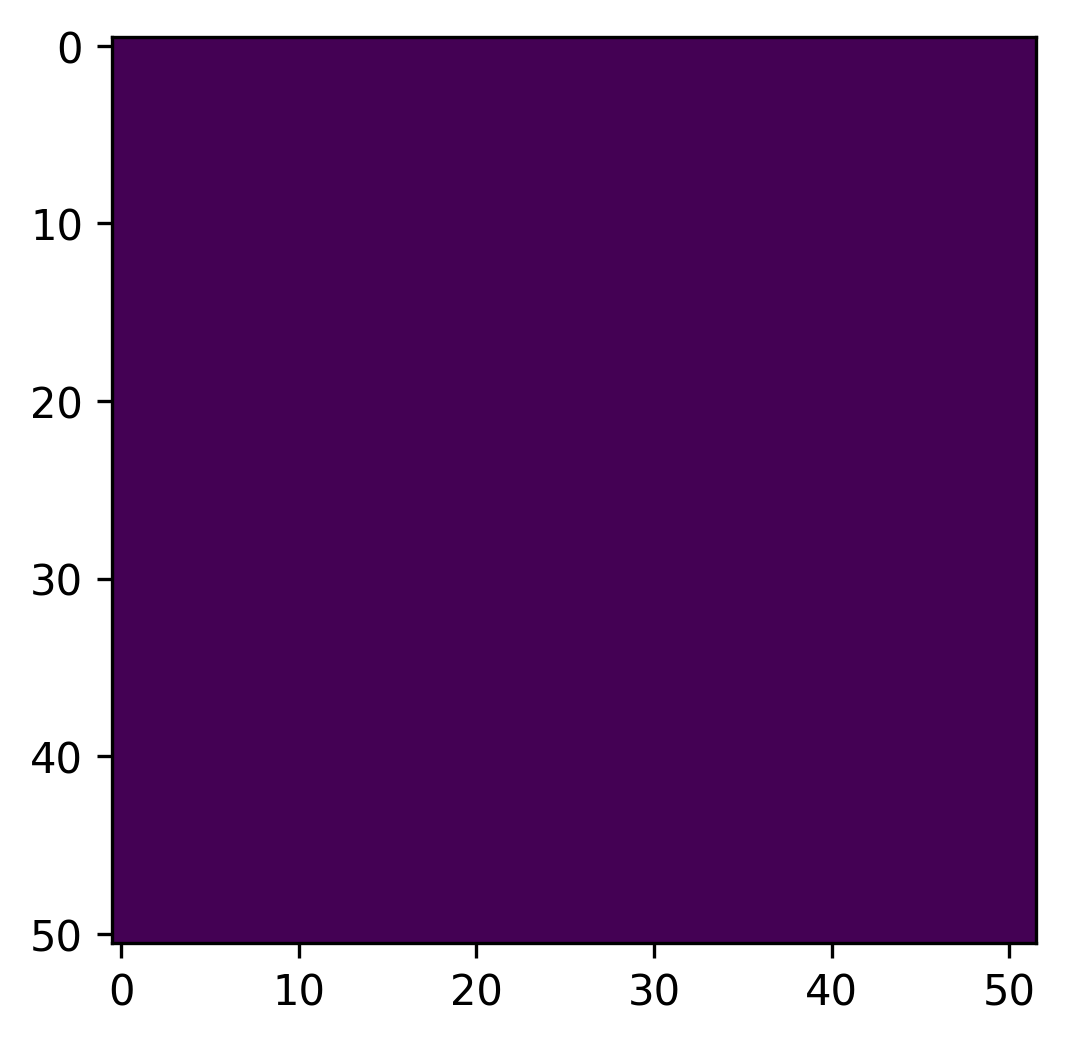

[]
Number of scales detected 0
Average size of scales:  nan
[[7, 108.33333333333333], [4, 101.0], [5, 91.25], [2, 127.0], [6, 710.0], [8, 457.42857142857144], [8, 424.14285714285717], [2, 50.0], [6, 119.6], [1, nan], [7, 97.5], [1, nan], [1, nan]]


In [6]:
#Factors that go into seeing if a scale is correct: size of the scale: distance of the scale to other scales
#Maybe look also at the distance of the scale from the
#arrays that keep track of important measurements
average_size = []
scale_num_per_img = []
sizes_of_scales = []
total_stats = []

#iterates through images to determine average size and count of scales in initial binarization

for i in np.arange(len(images)):
    img = images[i]
    plt.imshow(img)
    plt.show()

    binary_map = (img > 0).astype(np.uint8)
    connectivity = 4 # or whatever you prefer
    output = cv2.connectedComponentsWithStats(binary_map, connectivity, cv2.CV_32S)

    num_labels = output[0]
    # The second cell is the label matrix
    labels = output[1]
    # The third cell is the stat matrix
    stats = output[2]
    # The fourth cell is the centroid matrix
    centroids = output[3]
    
     
    print(stats[1:,-1])
    print("Number of scales detected", num_labels - 1)
    print("Average size of scales: ", np.average(stats[1:,-1]))
    
    sizes_of_scales.append((stats[1:,-1]))
    average_size.append(([num_labels, np.average(stats[1:,-1])]))
    total_stats.append([num_labels,stats[1:,-1], stats[1:,-1]])
    print(average_size)

    

In [7]:
for i in average_size:
    print(i)

[7, 108.33333333333333]
[4, 101.0]
[5, 91.25]
[2, 127.0]
[6, 710.0]
[8, 457.42857142857144]
[8, 424.14285714285717]
[2, 50.0]
[6, 119.6]
[1, nan]
[7, 97.5]
[1, nan]
[1, nan]


In [8]:
### a better way to do this? Run more significant tests to determine the best relationship you can


#array that stores final block size and iteration statistics
block_size = []

#tentative if statements: based on initial binarization determines block and iteration size
for stat in average_size:
    index = 0
    if stat[0] <= 1:
        block_size.append([15,1])
        
    elif stat[1] < 350 and max(sizes_of_scales[index]) < 300:
        block_size.append([25, 2])
    
    elif stat[1] < 350 and max(sizes_of_scales[index]) > 300:
        block_size.append([25, 2])
        
    else:
        block_size.append([75, 2])
        index +=1 


size_and_it = Table().with_columns("img_name", image_names, "block_size", [i[0] for i in block_size], "iterations" ,[i[1] for i in block_size])
size_and_it.show()



img_name,block_size,iterations
235227Ventral-Flash-1.png,25,2
235227Ventral-NoFlash-1.png,25,2
235227Ventral-Flash-2.png,25,2
235227Ventral-NoFlash-2.png,25,2
135164_V-3png.png,75,2
135164_V-1.png,75,2
135164_V-2.png,75,2
135164_D-3.png,25,2
135164_D-2.png,25,2
235237Dorsal-Flash-2.png,15,1


TESTING CUSTOM BLOCK SIZE

235227Ventral-Flash-1.png
Customized Values used
25 2


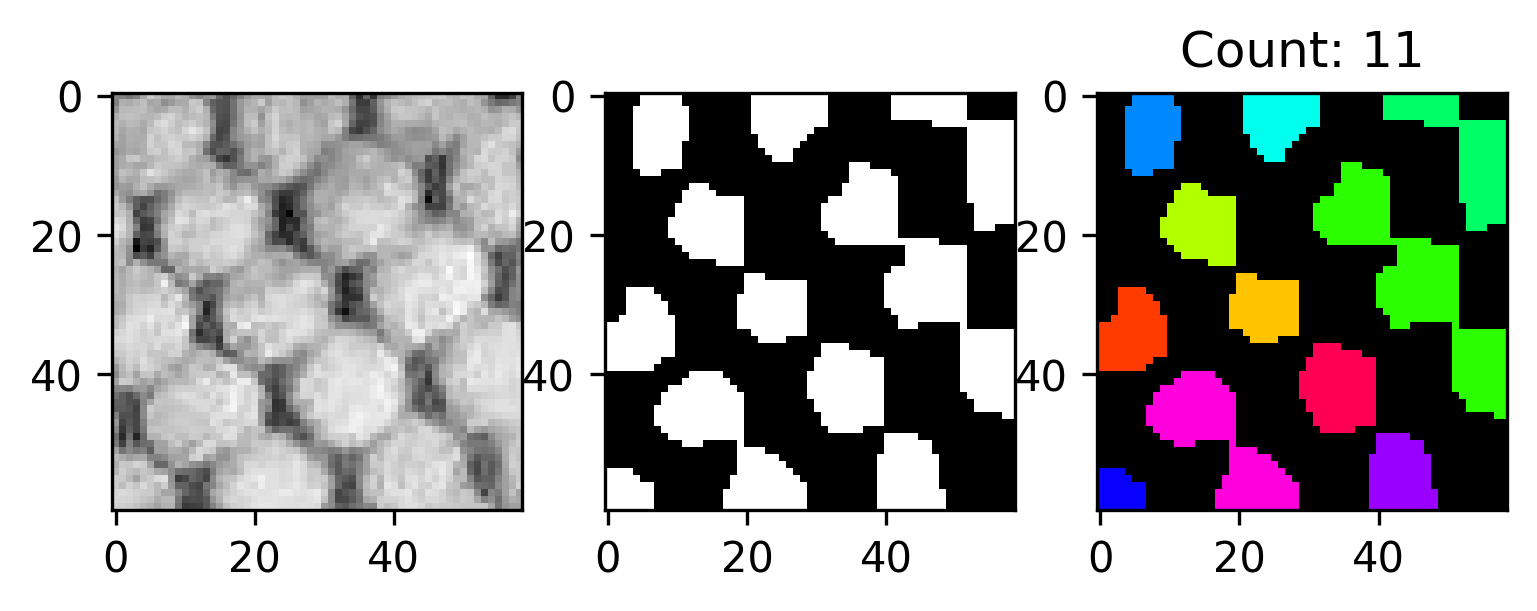

235227Ventral-NoFlash-1.png
Customized Values used
25 2


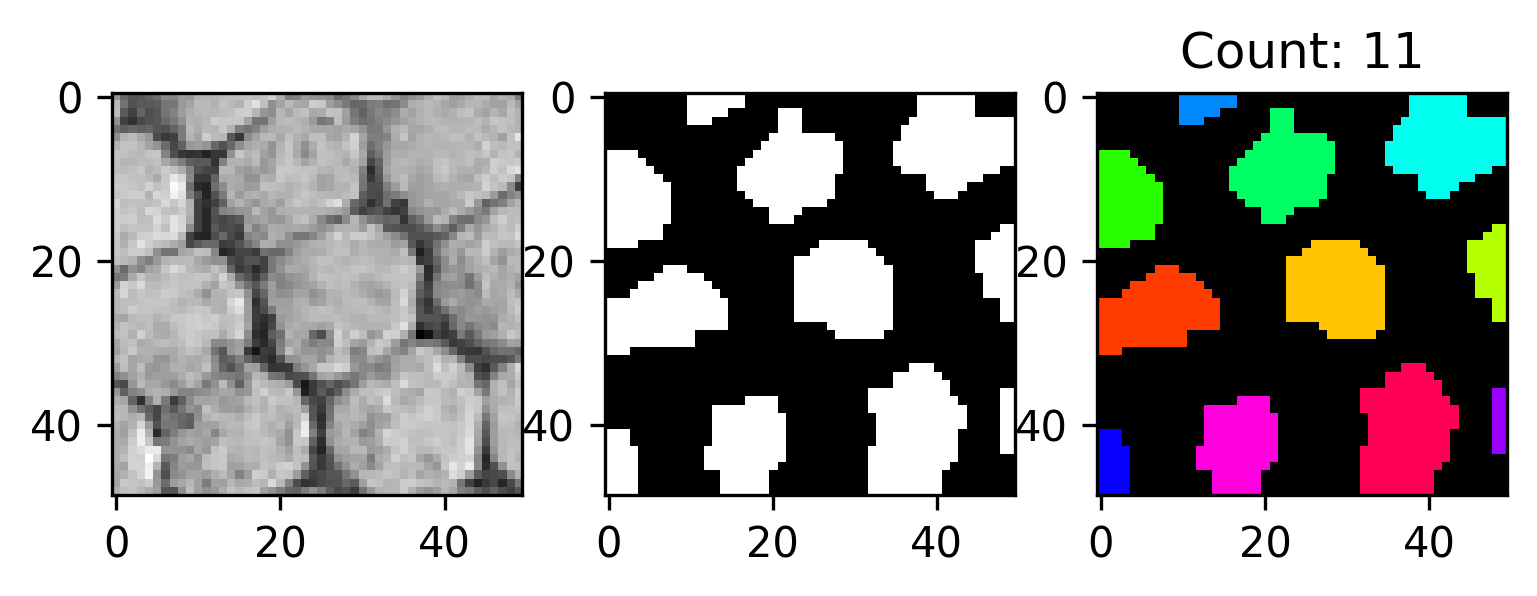

235227Ventral-Flash-2.png
Customized Values used
25 2


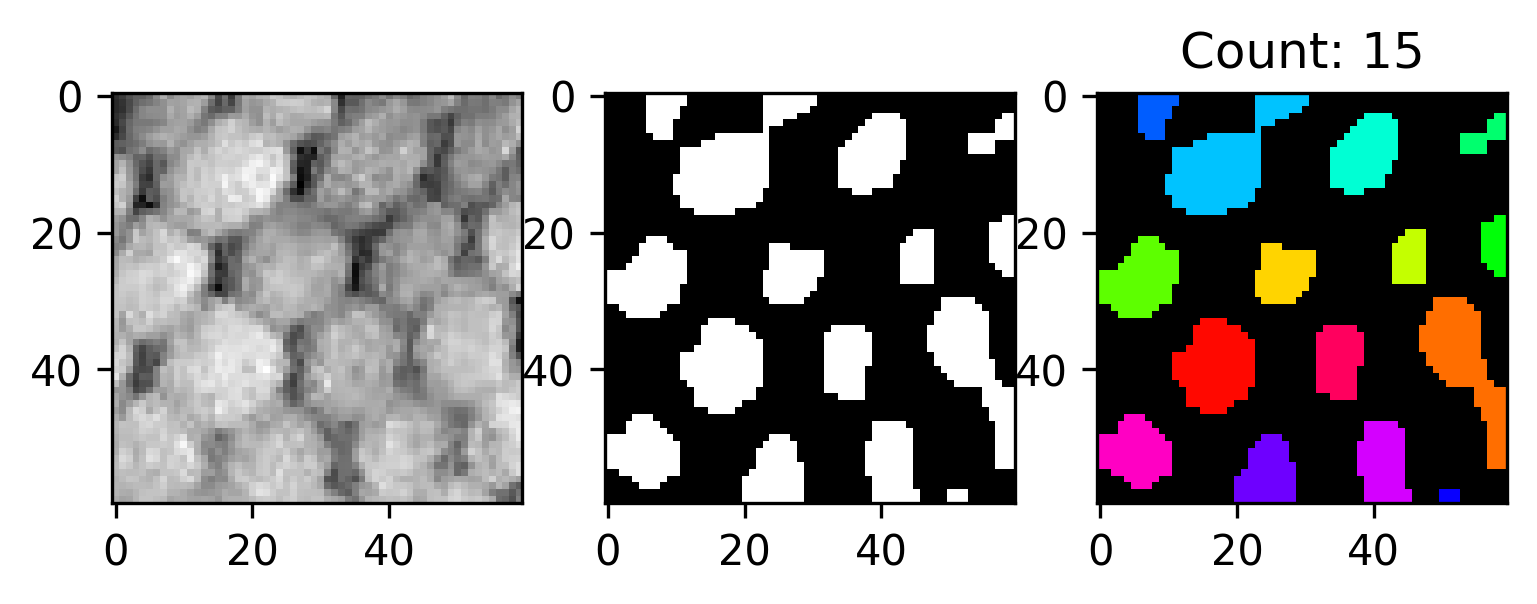

235227Ventral-NoFlash-2.png
Customized Values used
25 2


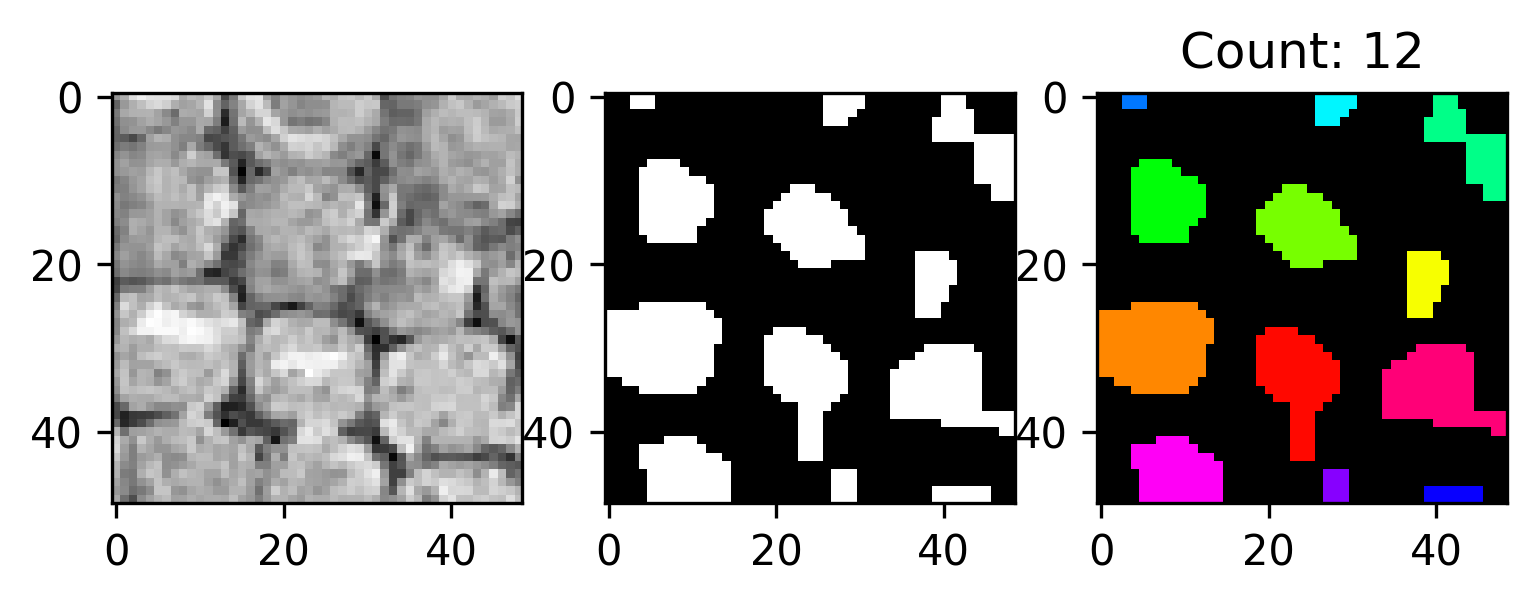

135164_V-3png.png
Customized Values used
75 2


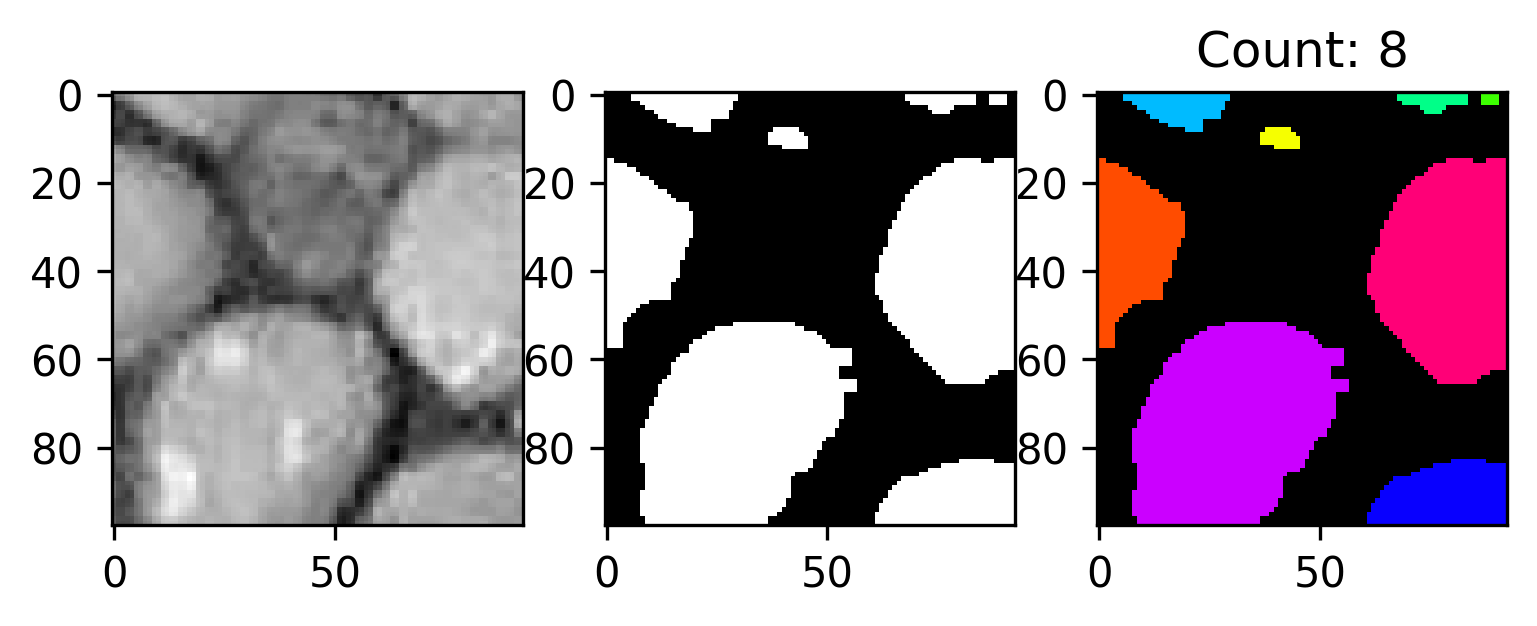

135164_V-1.png
Customized Values used
75 2


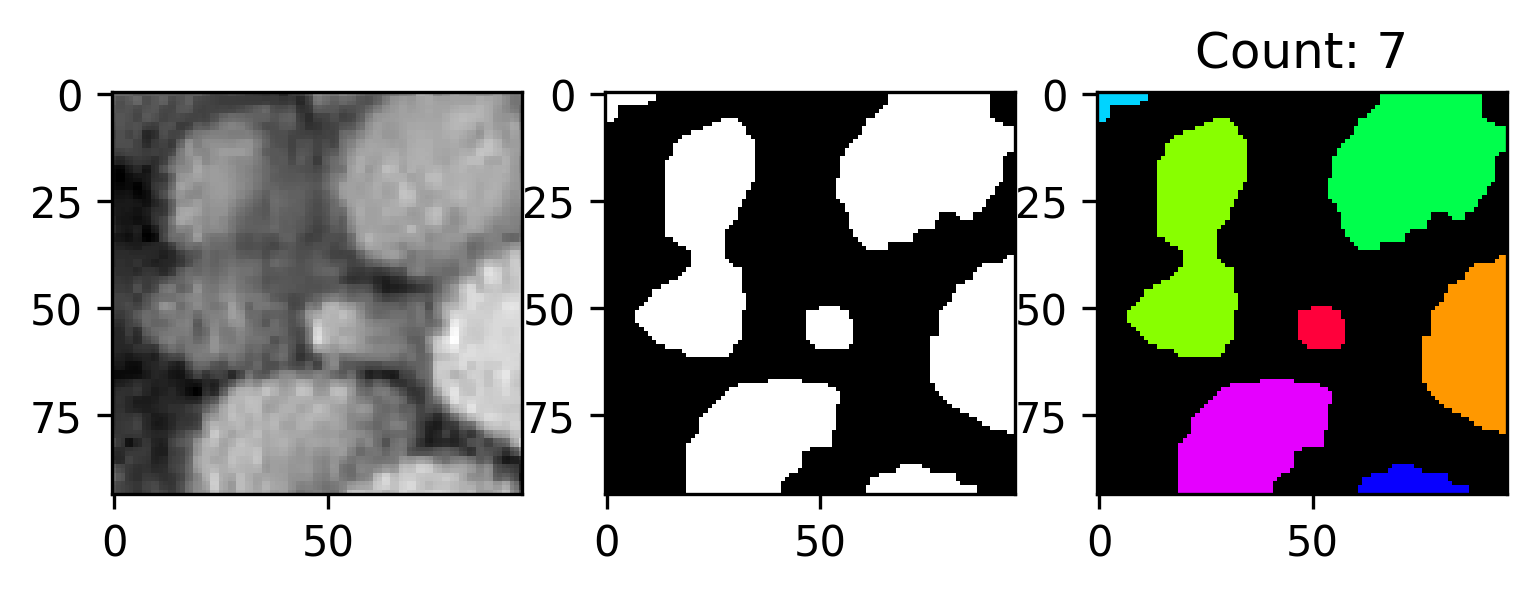

135164_V-2.png
Customized Values used
75 2


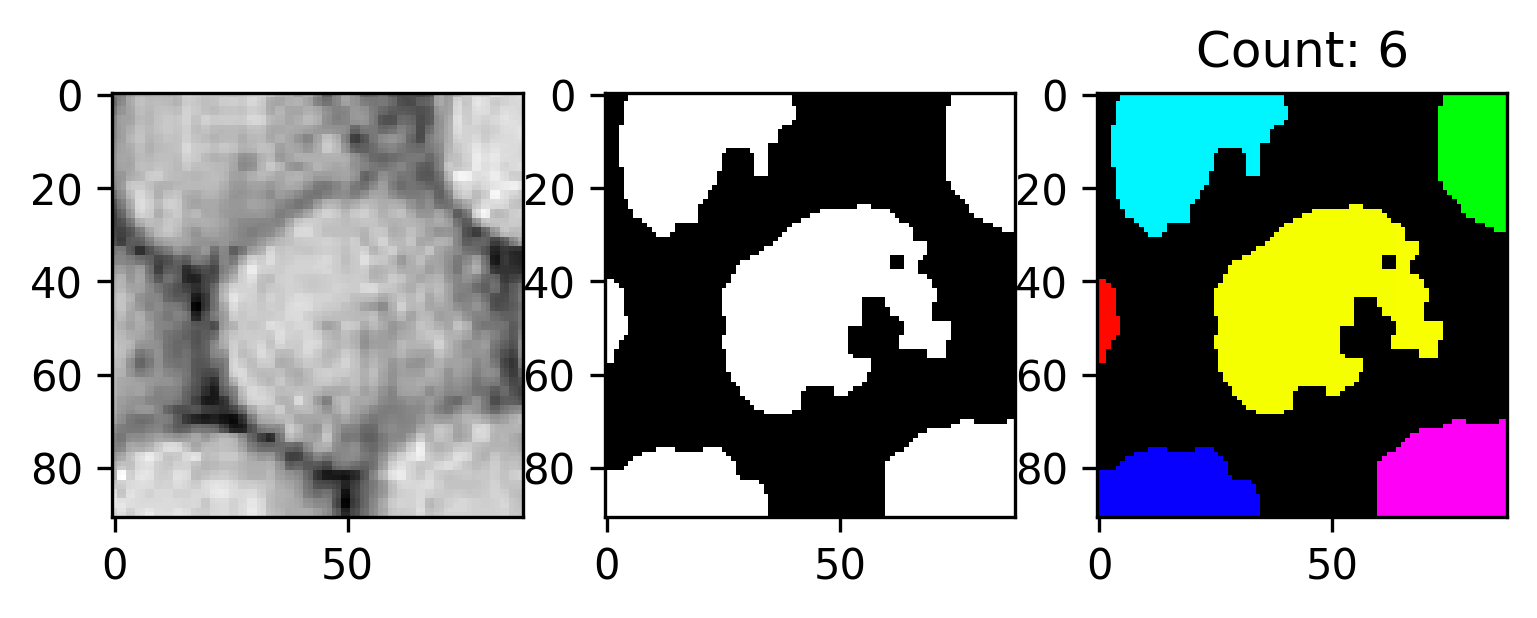

135164_D-3.png
Customized Values used
25 2


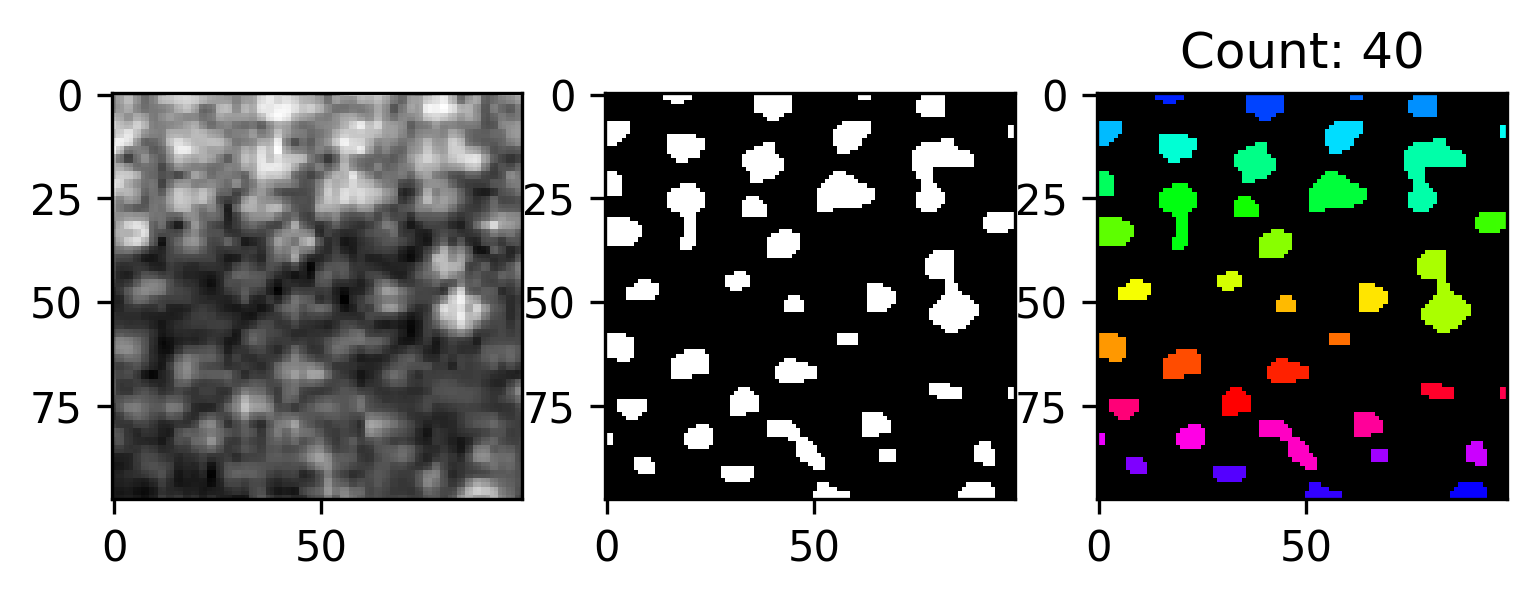

135164_D-2.png
Customized Values used
25 2


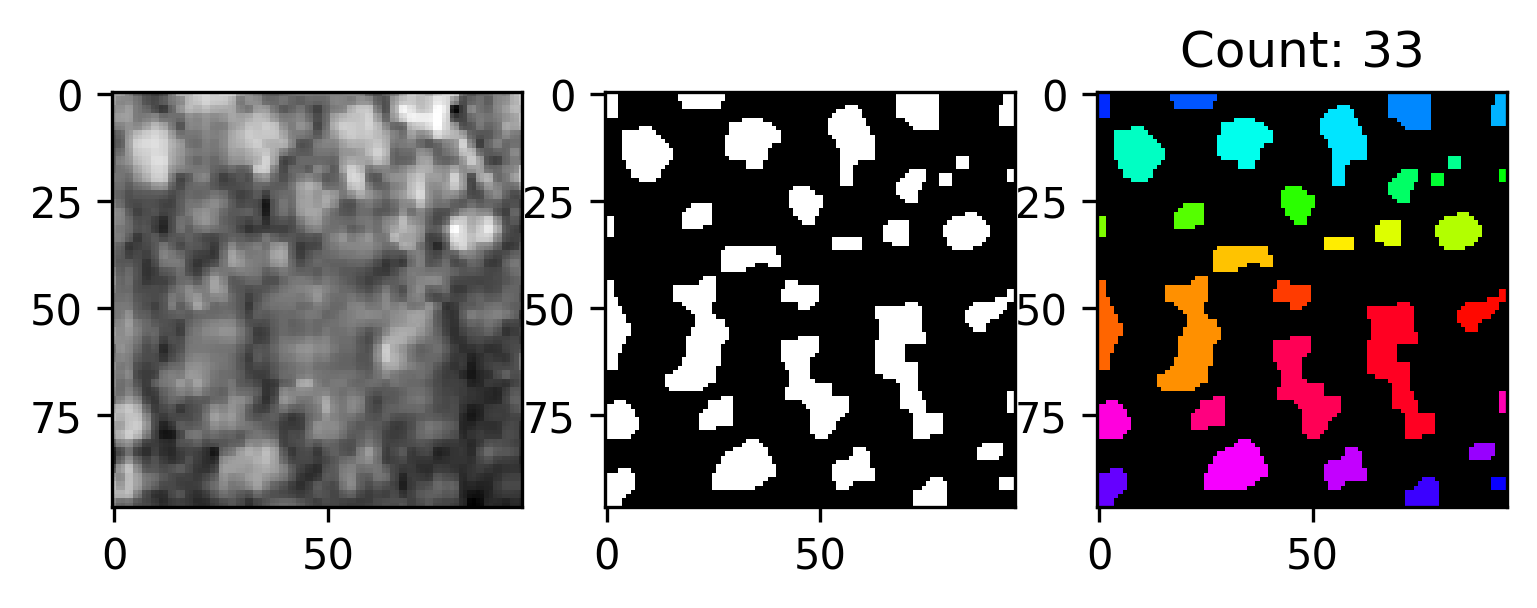

235237Dorsal-Flash-2.png
Customized Values used
15 1


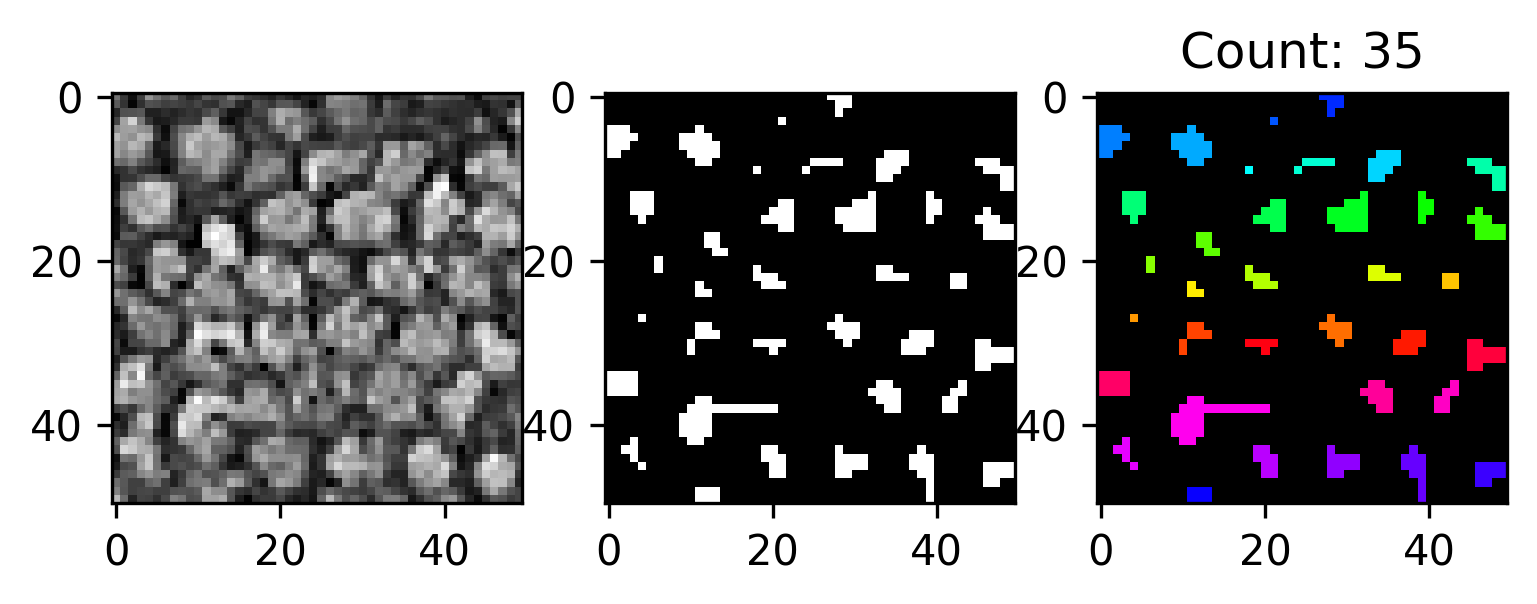

135164_D-1.png
Customized Values used
25 2


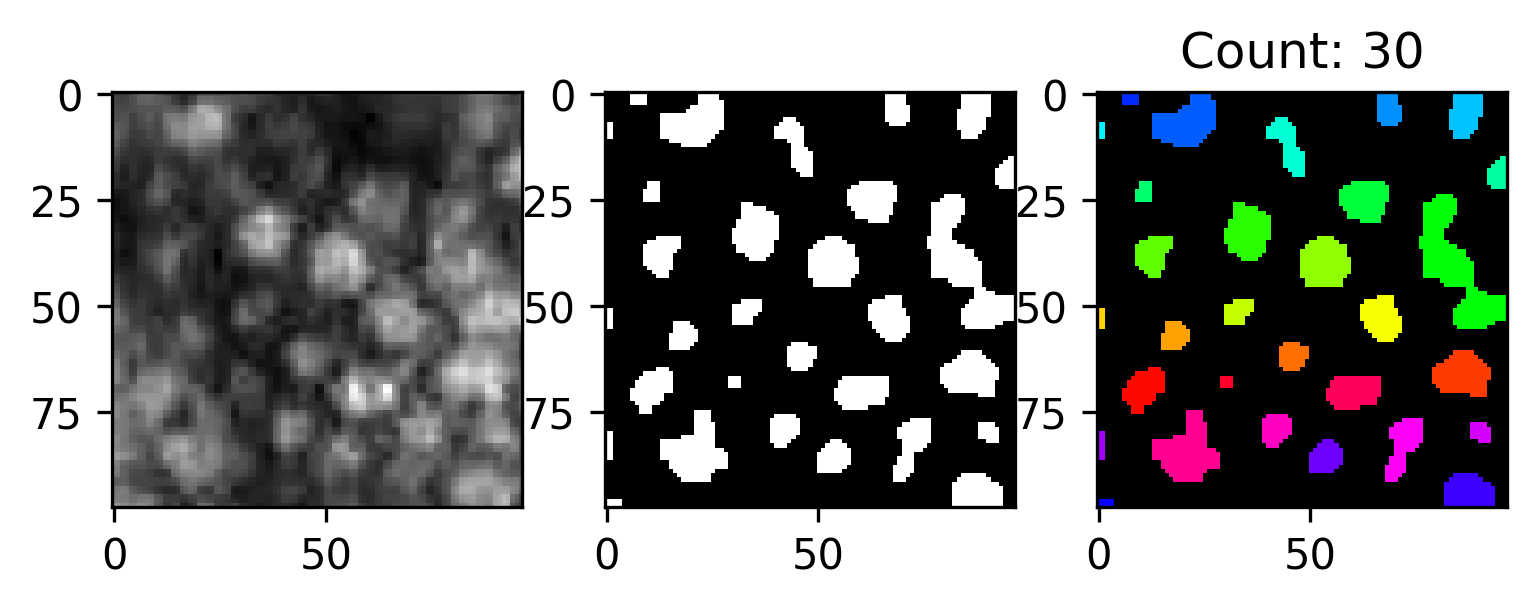

235237Dorsal-Flash-1.png
Customized Values used
15 1


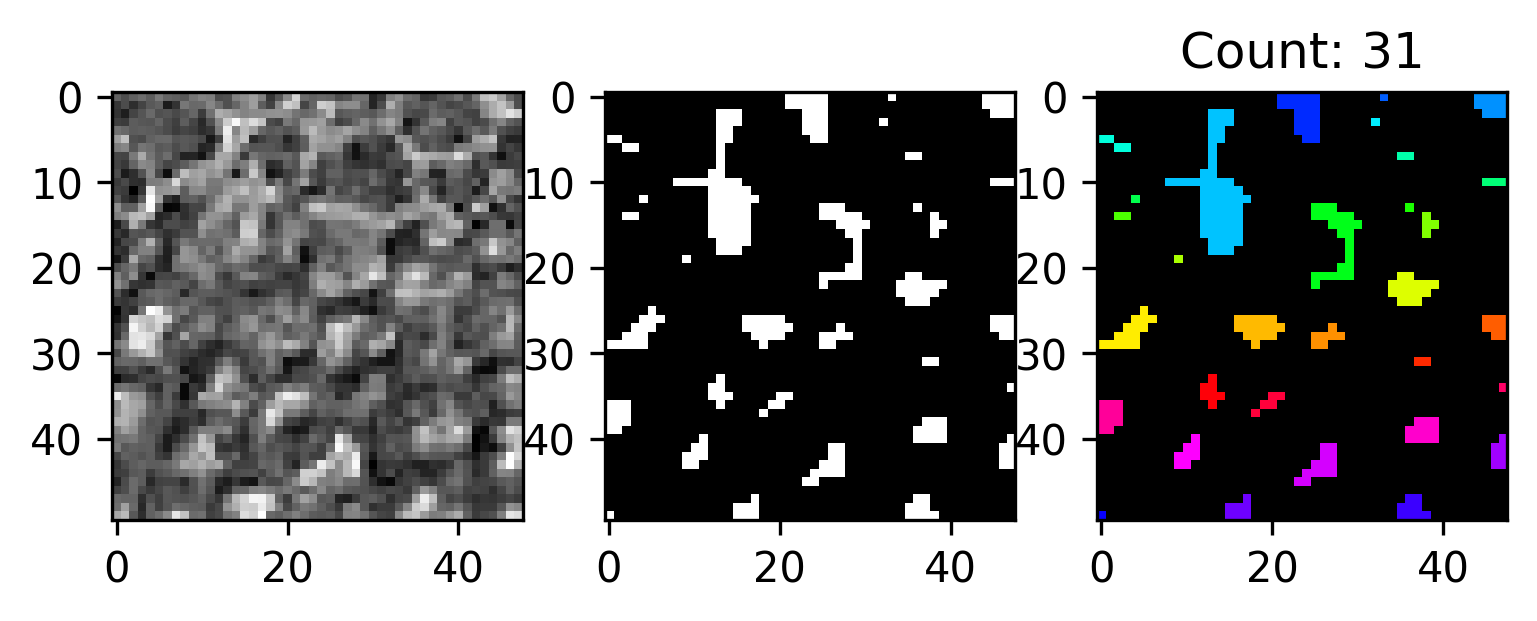

235233Dorsal-Flash-1.png
Customized Values used
15 1


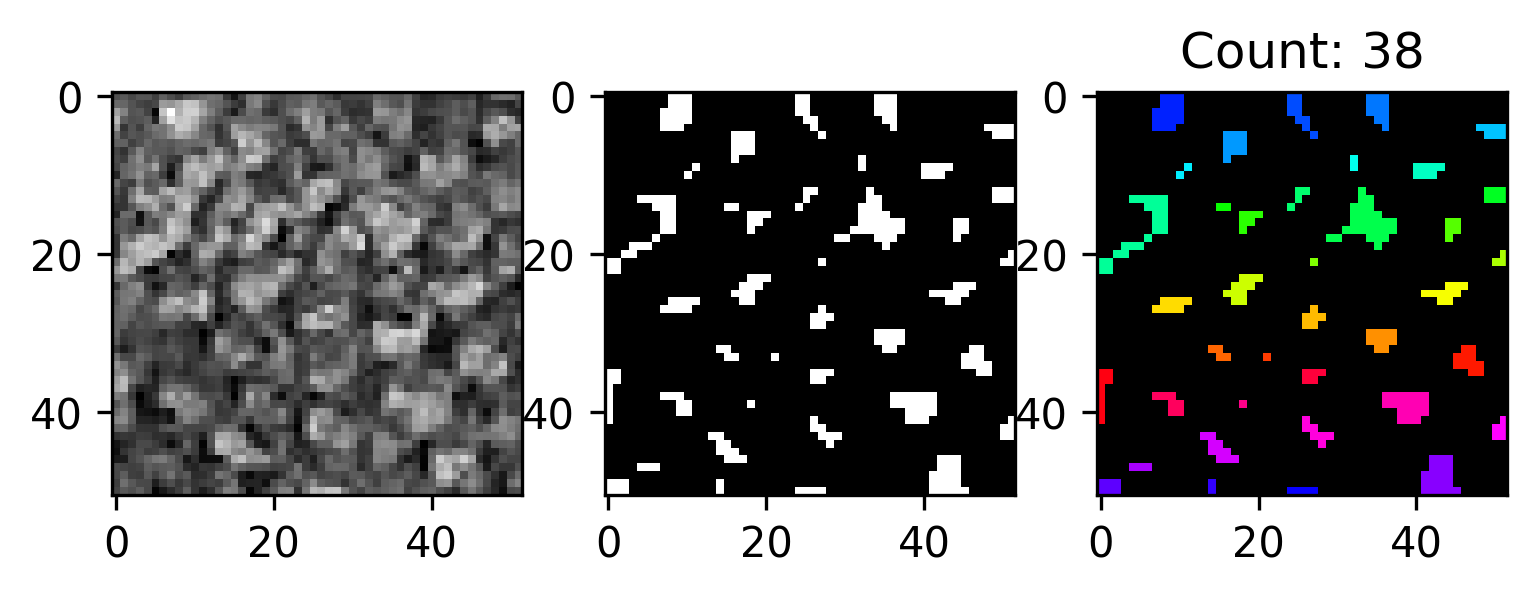

In [9]:
dirname = 'More_images/'

#create an iterator object for img directory
directory = os.scandir(dirname)

print("TESTING CUSTOM BLOCK SIZE\n")
images = []

initial_binarization(0, 0, block_size)



In [10]:
initial_binarization(41, 4,[])

In [11]:


all_scale_counts = [i[0] for i in total_stats]
all_sizes = [i[1] for i in total_stats]



#sorts the sizes of the array
for array_index in np.arange(len(all_sizes) - 1):
        all_sizes[array_index].sort()
        all_sizes[array_index] = all_sizes[array_index][::-1]

averages = []
for size_array in all_sizes:
    num_nums = (np.rint(len(size_array)/2)).astype(int)
    averages = np.append(averages, np.average(size_array[0:num_nums]))
    
# arrays_of_max = []
# for array in all_sizes:
#     max_array = array[:len()]
    
#print(max_array)
print(averages)

[ 141.33333333  119.          127.5                  nan 1269.
  654.5         602.5                  nan  181.5                  nan
  108.33333333           nan           nan]


In [12]:
def overlay(bw_img, color_mask, w1=0.2, w2=0.95):
    #plt.imshow(original_img[-1], 'gray')
    #plt.show()
    #plt.imshow(labeled_img, 'gray')
    #plt.show()

    a = cv2.cvtColor(bw_img, cv2.COLOR_GRAY2RGB)
    a -= np.min(a)
    a = a/np.max(a)*255
    a = np.clip(a, a_min=0, a_max=255).astype(int)
    #a = np.array([[i.tolist()+[0] if np.max(i)==0 else i.tolist()+[255] for i in j] for j in a])
    
    b = np.clip(color_mask, a_min=0, a_max=255).astype(int)
    #b = np.array([[i.tolist()+[255] for i in j] for j in b])
    
    c = cv2.addWeighted(b,w1,a,w2,0)
    #plt.imshow(b, 'gray')
    return c

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


TRYING TO CLEAN UP THE IMAGES AND REMOVE SMALL SPECKELS: SHOULD TAKE INTO ACCOUNT DISTANCE AND SIZE


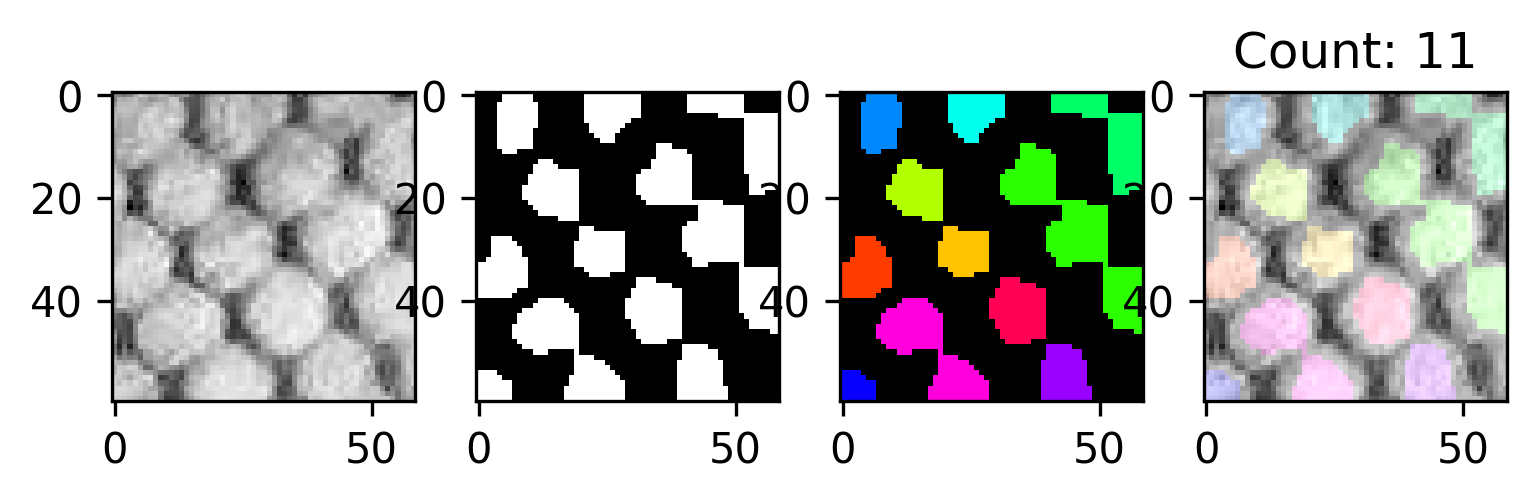

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


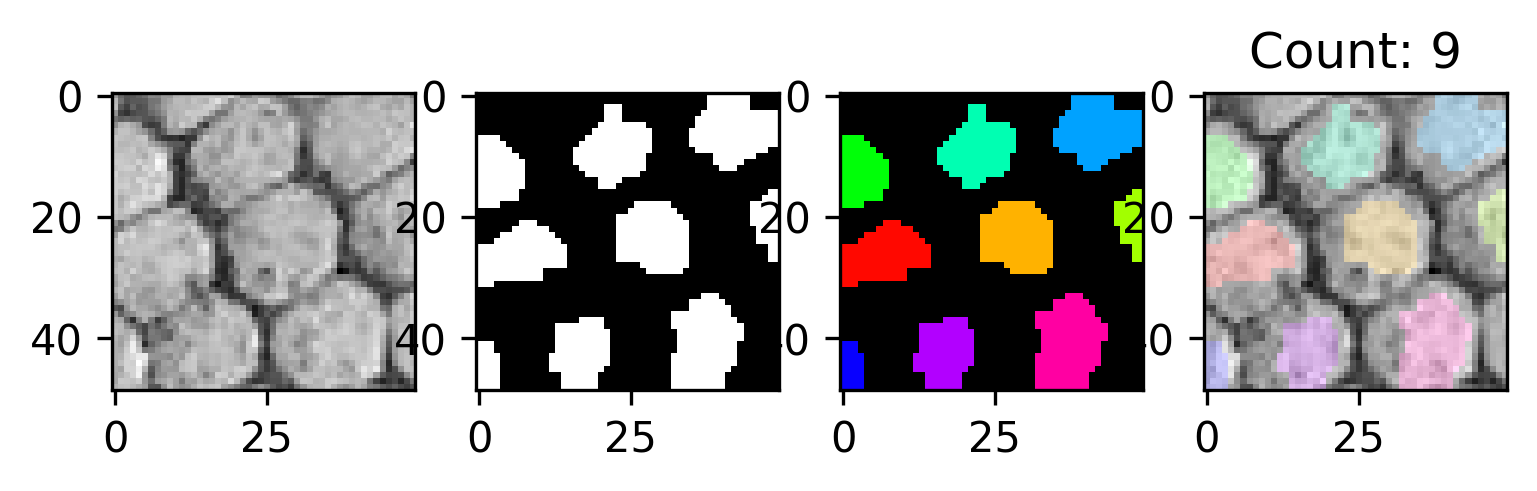

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


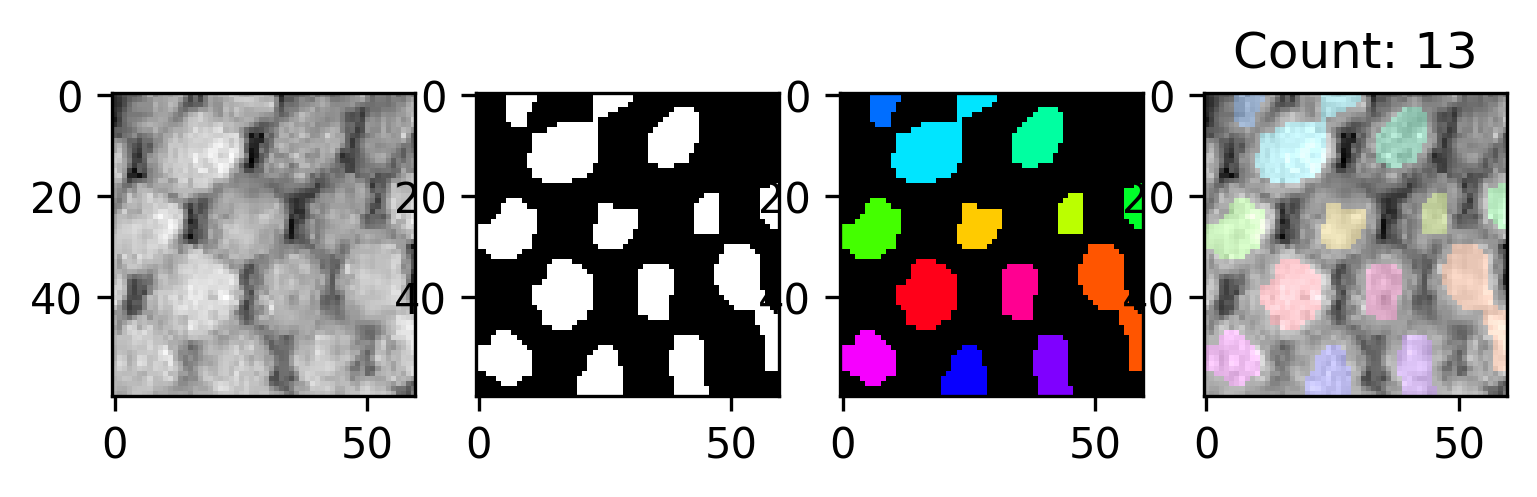

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


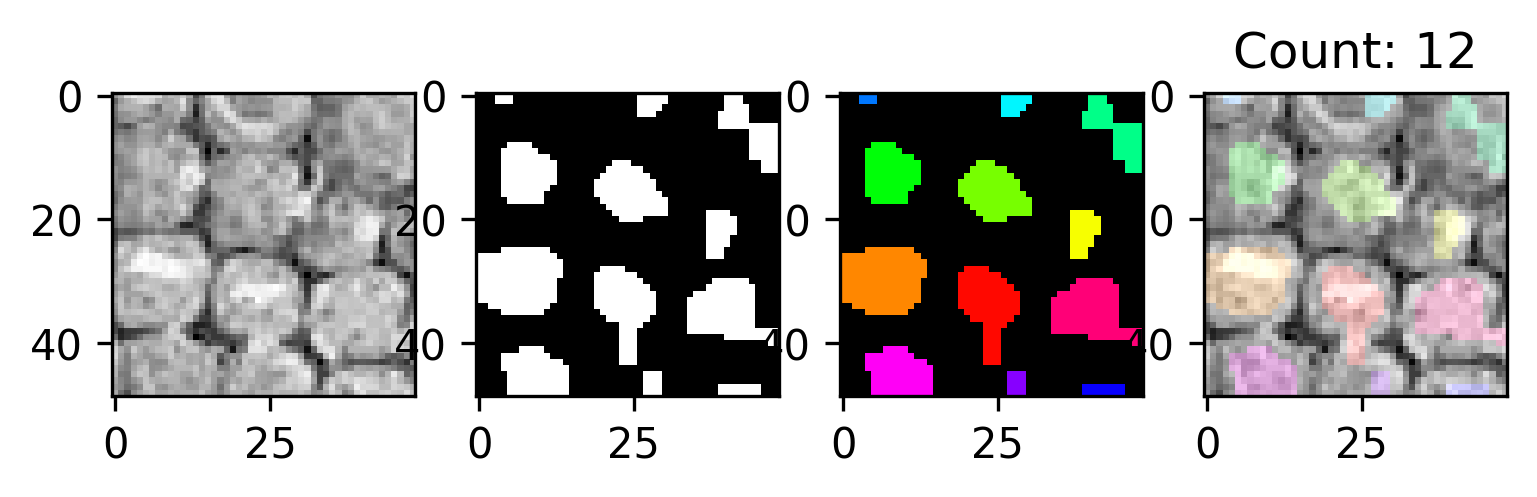

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


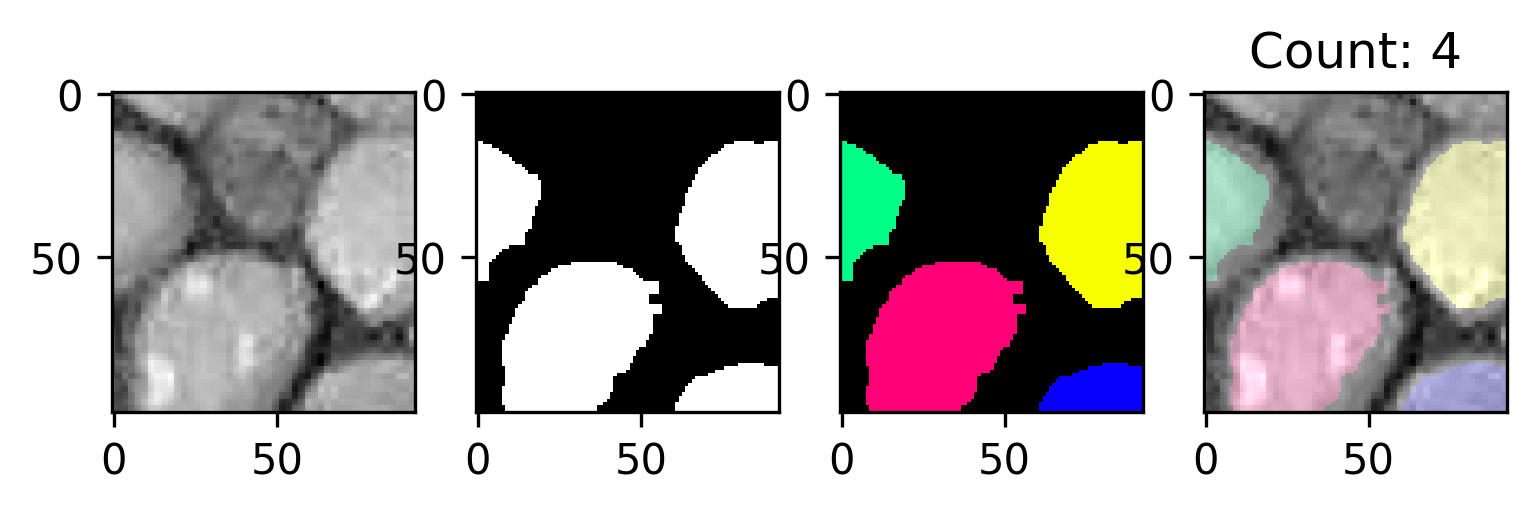

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


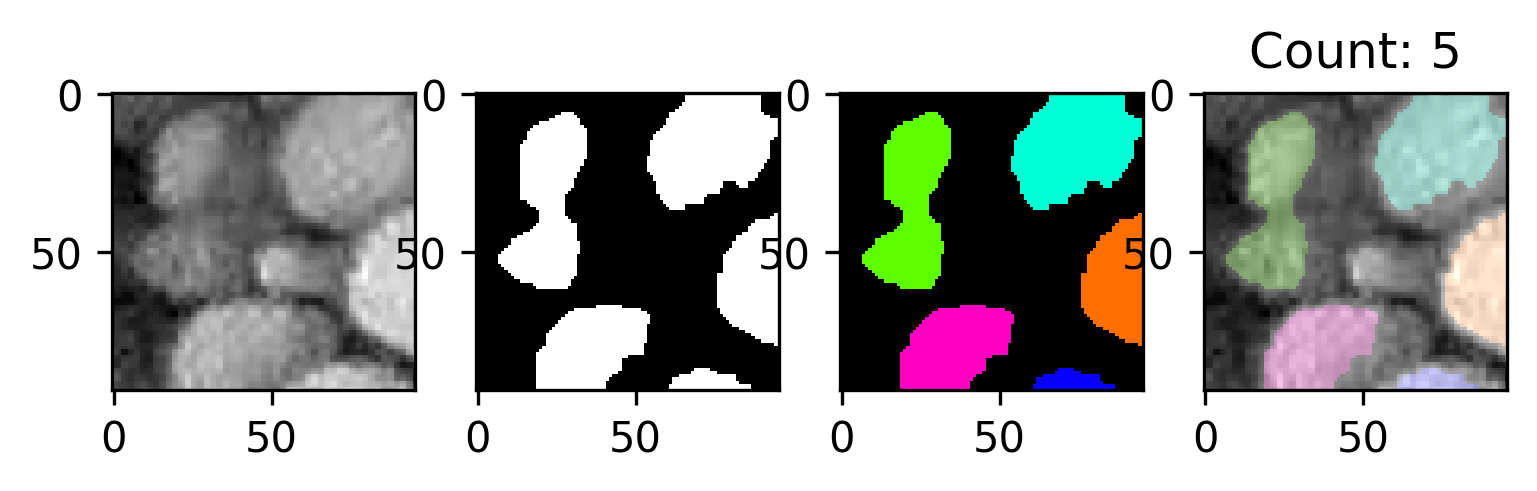

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


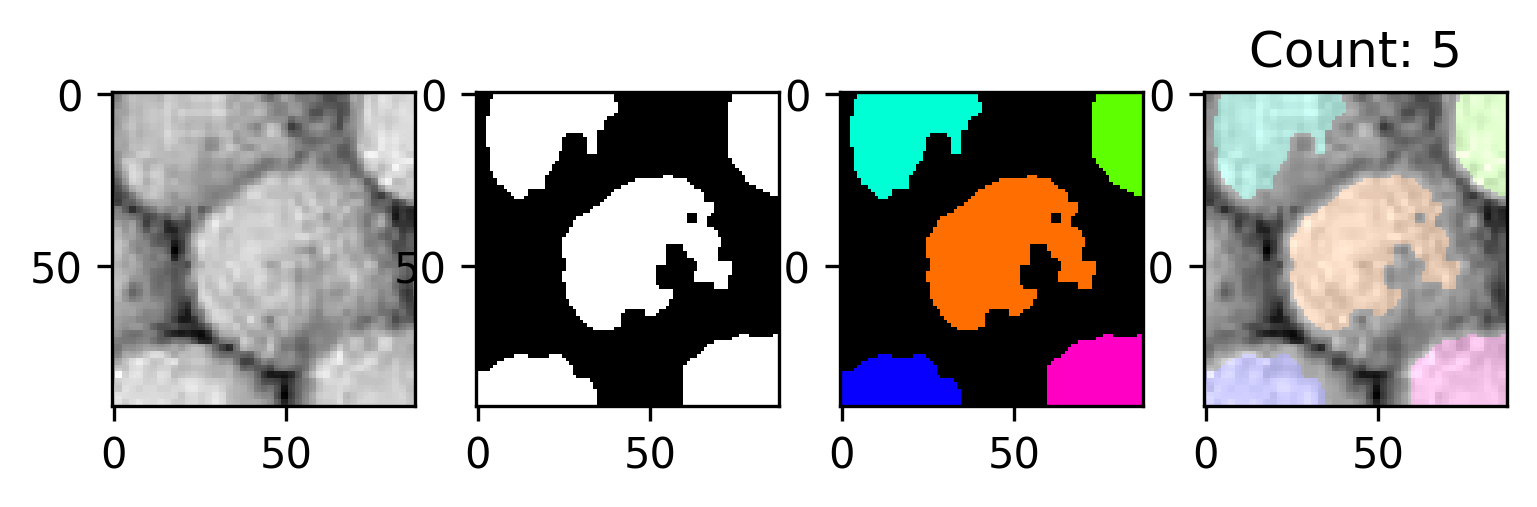

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


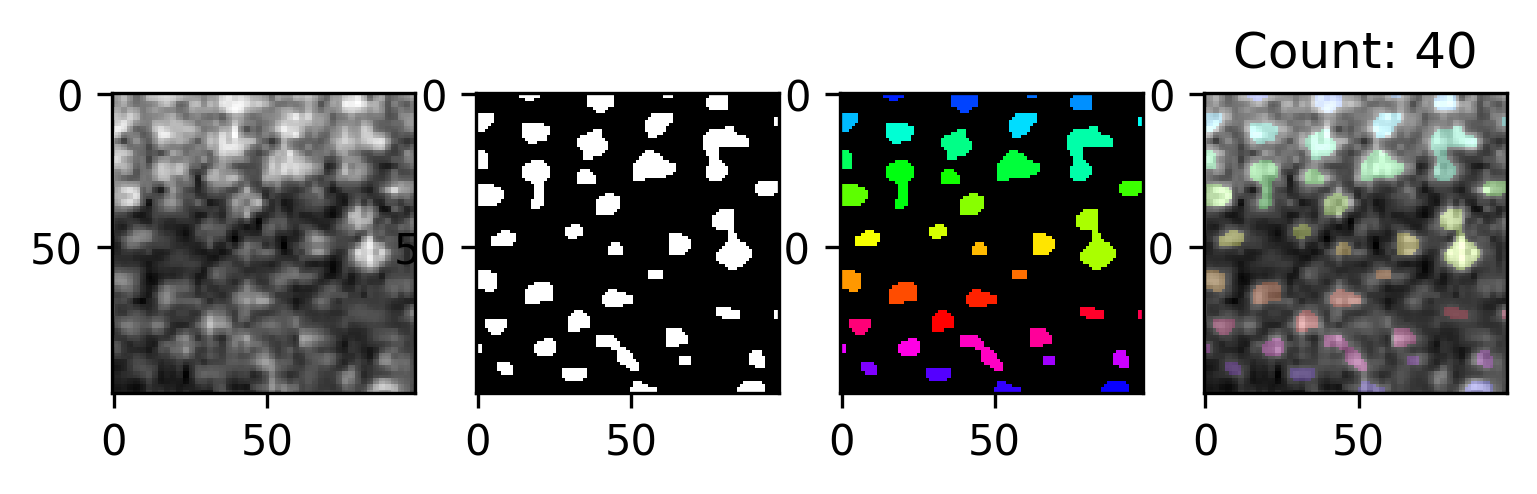

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


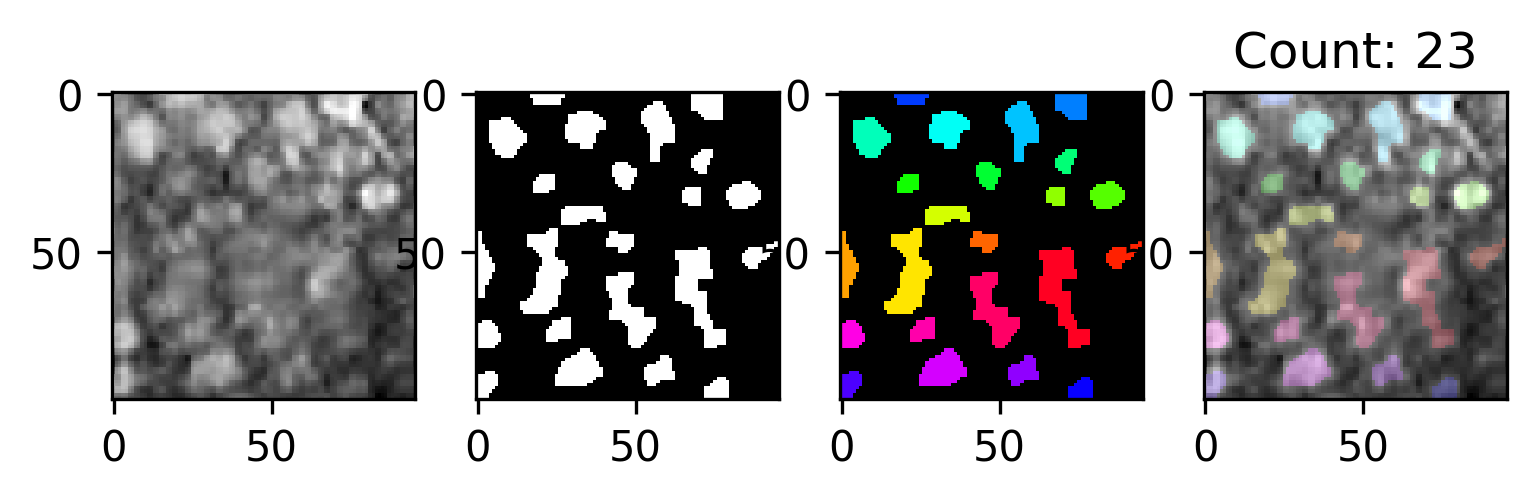

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


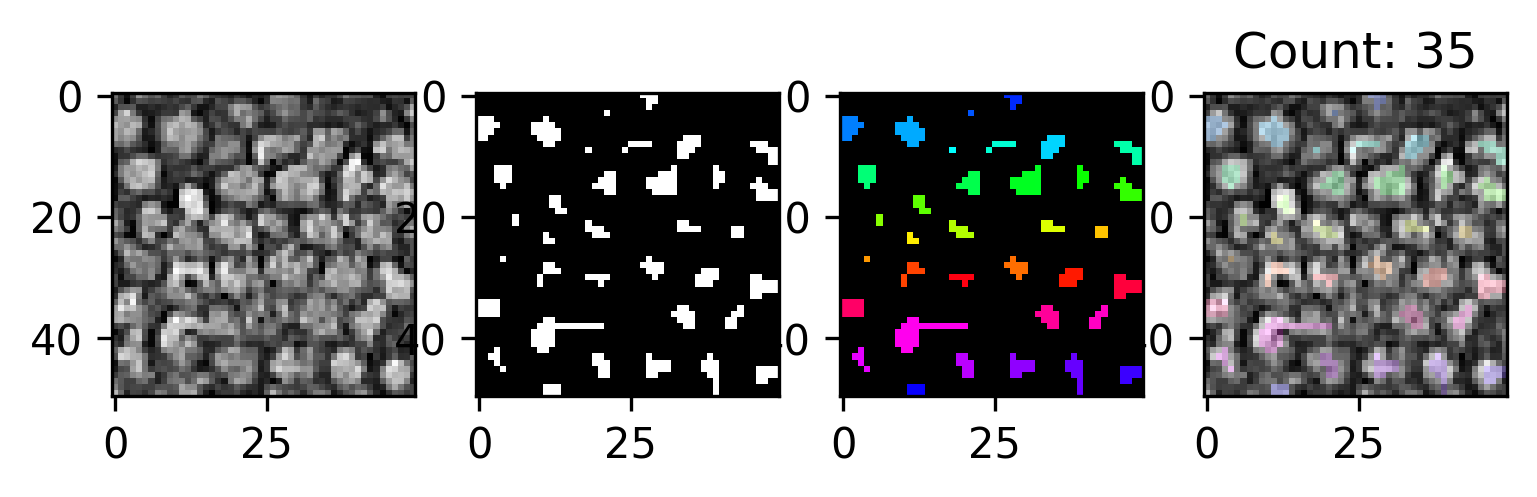

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


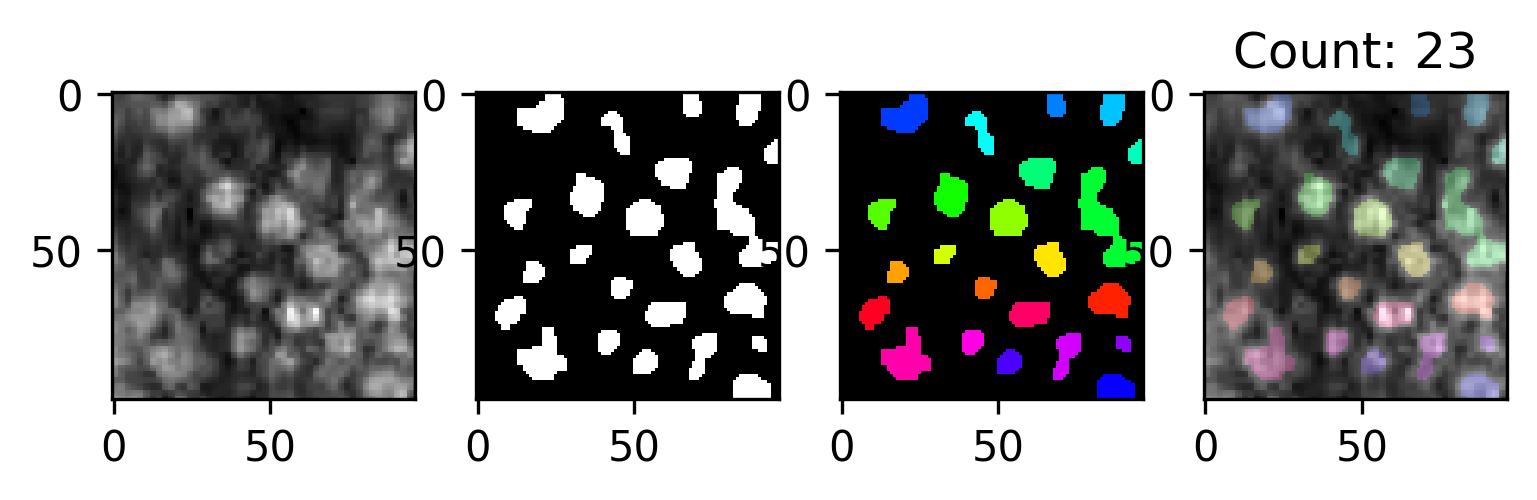

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


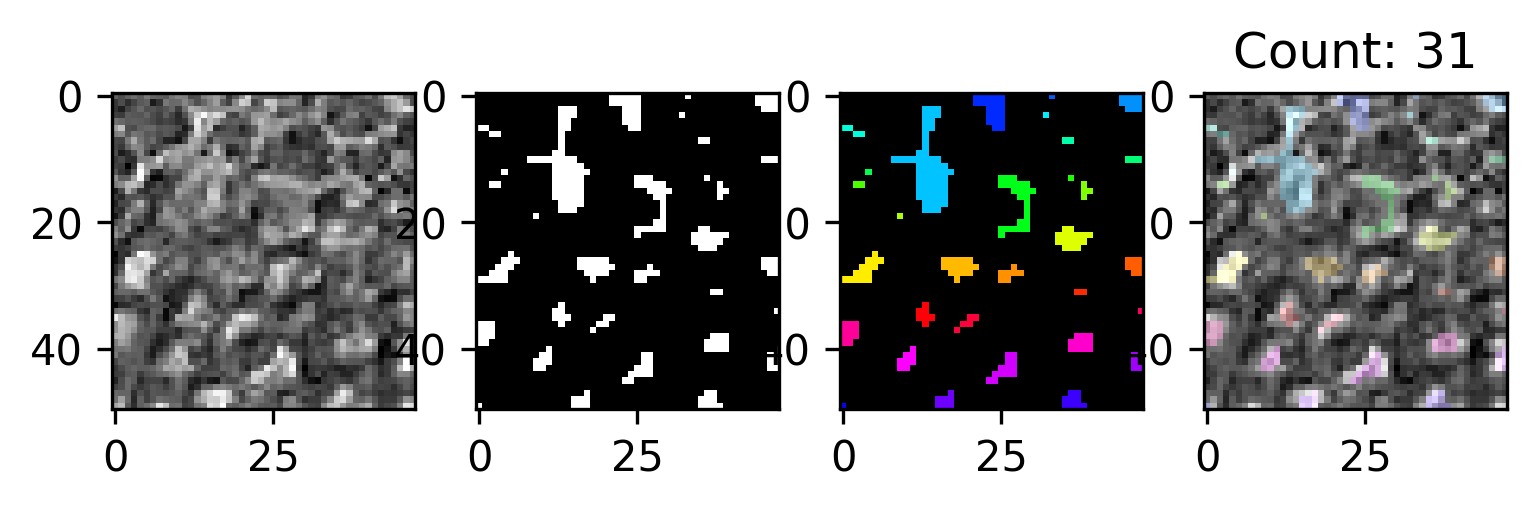

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


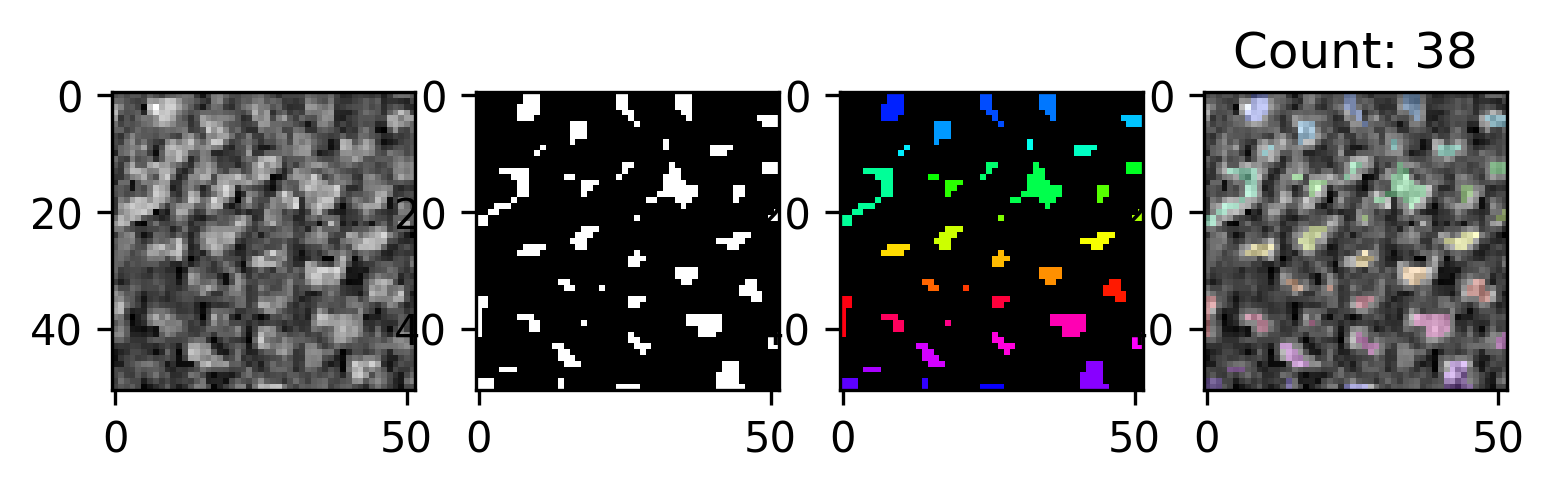

In [13]:


print("TRYING TO CLEAN UP THE IMAGES AND REMOVE SMALL SPECKELS: SHOULD TAKE INTO ACCOUNT DISTANCE AND SIZE")

index = 0;
for img in images:
    binary_map = (img > 0).astype(np.uint8)
    connectivity = 4 # or whatever you prefer
    output = cv2.connectedComponentsWithStats(binary_map, connectivity, cv2.CV_32S)
    stats = output[2]


    kernel = np.ones((3,3),np.uint8)
    #opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel, iterations=1)
    #closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel, iterations = 1)

    
    #review: what exactly does this do?
    cnts = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    for c in cnts:
        area = cv2.contourArea(c)
        if area < (averages[index]/8):
            img = cv2.drawContours(img, [c], -1, (0,0,0), -1)
            
    #plt.subplot(1,2,1), plt.imshow(original_img[index], 'gray')

    plt.subplot(1,4,1), plt.imshow(original_img[index], 'gray')
    plt.subplot(1,4,2), plt.imshow(img, 'gray')

    # Label and count (taken from maggie's code)
    # source: https://medium.com/analytics-vidhya/images-processing-segmentation-and-objects-counting-in-an-image-with-python-and-opencv-216cd38aca8e
    count, labels = cv2.connectedComponents(img)                
    count = count - 1 # background doesn't count as a scale
    label_hue = np.uint8(179 * labels / np.max(labels))
    blank_ch = 255 * np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
    labeled_img[label_hue == 0] = 0

    plt.subplot(1, 4, 3), plt.imshow(labeled_img, 'gray')
    plt.subplot(1, 4, 4), plt.imshow(overlay(original_img[index], labeled_img))
    
    plt.title('Count: ' + str(count))
    plt.show()
    index = index + 1


    

In [14]:
#THOUGHTS: COULD USE STANDARD DEVIATION: WHICH BLOCK SIZE MINIMIZES THE STANDARD DEVIATION OF THE SIZE? 
#BUT ALSO IF YOU DO THIS APPROACH MAY GET LESS SCALES